# KLASYKIFACJA Z WYKORZYSTANIEM SVN

Tematyka - modele predykcyjne
      
Zbiór danych : Default of Credit Card Clients.

Ten zbiór danych zawiera informacje o zaległościach w płatnościach, czynnikach demograficznych, danych kredytowych, historii płatności oraz wyciągach z rachunków klientów kart kredytowych na Tajwanie w okresie od kwietnia 2005 r. do września 2005 r.

### Wstępne przedstawienie danych

W zbiorze znajduje się 25 zmiennych:

ID: ID każdego klienta

LIMIT_BAL: Kwota przyznanego kredytu w dolarach NT (obejmuje kredyt indywidualny i rodzinny/uzupełniający)

SEX: Płeć (1=male (mężczyzna), 2=female (kobieta))

EDUCATION: (1=szkoła wyższa, 2=uniwersytet, 3=szkoła średnia, 4=inne, 5=nieznane, 6=nieznane)

MARRIAGE: Stan cywilny (1=małżeństwo, 2=samotna, 3=inne)

AGE: wiek w latach

PAY_0: Status spłaty we wrześniu 2005 r. (-1=spłata należyta, 1=opóźnienie w spłacie o jeden miesiąc, 2=opóźnienie w spłacie o dwa miesiące, ...., 8=opóźnienie w spłacie za osiem miesięcy, 9=opóźnienie w spłacie za dziewięć miesięcy i więcej)

PAY_2: Stan spłat w sierpniu 2005 r. (skala taka sama jak powyżej)

PAY_3: Stan spłat w lipcu 2005 r. (skala taka sama jak powyżej)

PAY_4: Stan spłat w czerwcu 2005 r. (skala taka sama jak powyżej)

PAY_5: Stan spłat w maju 2005 r. (skala taka sama jak powyżej)

PAY_6: Stan spłat w kwietniu 2005 r. (skala taka sama jak powyżej)

BILL_AMT1: Kwota wyciągu z rachunku za wrzesień 2005 r. (w dolarach NT)

BILL_AMT2: Kwota wyciągu z rachunku za sierpień 2005 r. (w dolarach NT)

BILL_AMT3: Kwota wyciągu z rachunku za lipiec 2005 r. (w dolarach NT)

BILL_AMT4: Kwota wyciągu z rachunku za czerwiec 2005 r. (w dolarach NT)

BILL_AMT5: Kwota wyciągu z rachunku za maj 2005 r. (w dolarach NT)

BILL_AMT6: Kwota wyciągu z rachunku za kwiecień 2005 r. (w dolarach NT)

PAY_AMT1: Kwota poprzedniej płatności z września 2005 r. (w dolarach NT)

PAY_AMT2: Kwota poprzedniej płatności z sierpnia 2005 r. (w dolarach NT)

PAY_AMT3: Kwota poprzedniej płatności z lipca 2005 r. (w dolarach NT)

PAY_AMT4: Kwota poprzedniej płatności z czerwca 2005 r. (w dolarach NT)

PAY_AMT5: Kwota poprzedniej płatności z maja 2005 r. (w dolarach NT)

PAY_AMT6: Kwota poprzedniej płatności z kwietnia 2005 r. (w dolarach NT)

default.payment.next.month: Płatność za opóźnienie (1=tak, 0=nie)

### Ładowanie pakietów 

In [1]:
import pandas as pd # manipulate data and One-Hot Encoding
from pandas import Series, DataFrame
import numpy as np # data manipulation
import matplotlib # drawing graphs
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
%matplotlib inline 

import gc
from datetime import datetime 
from sklearn import metrics # calculation of metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
#from sklearn.ensemble import AdaBoostClassifier
#from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
import lightgbm as lgb
import xgboost as xgb

pd.set_option('display.max_columns', 100) # way to widen the display of output
# help for 'set_option': https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html

from sklearn import datasets
from pandas_profiling import ProfileReport 

import scipy.stats as stats # data understanding
import statsmodels.formula.api as smf
from sklearn.metrics import classification_report

In [2]:
from sklearn.utils import resample # downsample the dataset
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn import preprocessing # scale and center data
from sklearn.svm import SVC # make a support vector machine for classificaiton
from sklearn.model_selection import GridSearchCV # cross validation
from sklearn.metrics import confusion_matrix # create a confusion matrix
from sklearn.metrics import accuracy_score # calculating accuracy score
from sklearn.metrics import plot_confusion_matrix # draw a confusion matrix
from sklearn.decomposition import PCA # perform PCA to plot the data

import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.cm as cm

Ustawienie parametrów - w tym miejscu ustawiamy kilka parametrów dla analizy i modeli

In [3]:
RFC_METRIC = 'gini'  # metric for RandomForrestClassifier
NUM_ESTIMATORS = 100 # #number of estimators for RandomForrestClassifier
NO_JOBS = 4 # number of parallel jobs for RandomForrestClassifier

# VALIDATION
VALID_SIZE = 0.20 # validation using train_test_split

# CROSS-VALIDATION
NUMBER_KFOLDS = 5 # number of KFolds for cross-validation

RANDOM_STATE = 2018

MAX_ROUNDS = 1000 # lgb iterations
EARLY_STOP = 50 # lgb early stop 
#OPT_ROUNDS = 1000  # To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 # print out metric result

#IS_LOCAL = False

### Wczytanie i sprawdzenie danych 

##### Wstępne spojrzenie na dane 

In [4]:
dataframe = pd.read_csv('Data.csv')
print(dataframe.shape)
dataframe.head()

(30000, 25)


ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2     3913.0     3102.0      689.0        0.0        0.0   
1      0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2      0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3      0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4      0      0     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4    19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0   

   default.payment.next.month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

##### Sprawdzenie podstawowych informacji na temat datasetu - z użyciem 

In [5]:
profile = ProfileReport(dataframe, title="Pandas Profiling Report", explorative=True)
profile.to_file("my_report.pdf")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\pandas_profiling\profile_report.py:262: UserWarning: Extension .pdf not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##### Sprawdzenie podstawowych informacji na temat datasetu - podejście klasyczne

In [6]:
dataframe.info

<bound method DataFrame.info of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  PAY_5

Sprawdźmy podstawowe statystyki opisowe w naszym zbiorze

In [7]:
dataframe.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_5         PAY_6      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count  30000.000000  30000.000000   30000.000000   30000.000000  3.000000e+04   
mean      -0.266200     -0.291100   51223.330900   49179.075167  4.701315e+04   
std        1.133187      1.149988   73635.860576   71173.768783  6.934939e+04   
min       -2.000000     -2.000000 -165580.000000  -69777.000000 -1.572640e+05   
25%       -1.000000     -1.000000    3558.750000    2984.750000  2.666250e+03   
50%        0.000000      0.000000   22381.500000   21200.000000  2.008850e+04   
75%        0.000000      0.000000   67091.000000   64006.250000  6.016475e+04   
max        8.000000      8.000000  964511.000000  983931.000000  1.664089e+06   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count   30000.000000   30000.000000   30000.000000   30000.000000   
mean    43262.948967   40311.400967   38871.760400    5663.580500   
std     64332.856134   60797.155770   59554.107537   16563.280354   
min   -170000.000000  -81334.000000 -339603.000000       0.000000   
25%      2326.750000    1763.000000    1256.000000    1000.000000   
50%     19052.000000   18104.500000   17071.000000    2100.000000   
75%     54506.000000   50190.500000   49198.250000    5006.000000   
max    891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000

Istnieje 30 000 różnych klientów kart kredytowych.

Średnia wartość dla kwoty limitu karty kredytowej wynosi 167 484. Odchylenie standardowe jest ogromne, a maksymalna wartość wynosi 1M.

Poziom wykształcenia to głównie szkoła średnia i uniwersytet.

Większość klientów to osoby pozostające w związku małżeńskim lub samotnie wychowujące dzieci (rzadziej w innym stanie).

Średnia wieku wynosi 35,5 roku, a odchylenie standardowe 9,2.

Ponieważ wartość 0 dla zaległości w spłacie oznacza "brak zaległości", a wartość 1 oznacza "zaległość", średnia 0,221 oznacza, że 22,1% umów o kartę kredytową będzie zalegać z płatnościami w przyszłym miesiącu (zostanie to zweryfikowane w kolejnych częściach analizy).

##### Sprawdzenie braków danych 

Sprawdźmy, czy występują jakieś braki danych.

In [8]:
total_dataset = dataframe.isnull().sum().sort_values(ascending = False) # sumujemy braki danych
percent = (dataframe.isnull().sum()/dataframe.isnull().count()*100).sort_values(ascending = False)
pd.concat([total_dataset, percent], axis=1, keys=['Total', 'Percent']).transpose()

ID  BILL_AMT2  PAY_AMT6  PAY_AMT5  PAY_AMT4  PAY_AMT3  PAY_AMT2  \
Total    0.0        0.0       0.0       0.0       0.0       0.0       0.0   
Percent  0.0        0.0       0.0       0.0       0.0       0.0       0.0   

         PAY_AMT1  BILL_AMT6  BILL_AMT5  BILL_AMT4  BILL_AMT3  BILL_AMT1  \
Total         0.0        0.0        0.0        0.0        0.0        0.0   
Percent       0.0        0.0        0.0        0.0        0.0        0.0   

         LIMIT_BAL  PAY_6  PAY_5  PAY_4  PAY_3  PAY_2  PAY_0  AGE  MARRIAGE  \
Total          0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0       0.0   
Percent        0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0       0.0   

         EDUCATION  SEX  default.payment.next.month  
Total          0.0  0.0                         0.0  
Percent        0.0  0.0                         0.0

Wniosek: W całym zbiorze danych nie ma brakujących danych.

##### Sprawdzenie, czy dane są zbalansowane

Sprawdźmy, czy dane są niezbalansowane w odniesieniu do wartości docelowej, tj. default.payment.next.month.

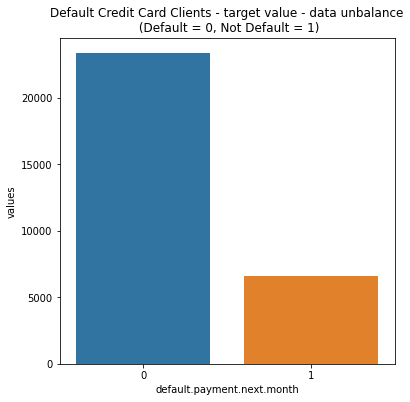

In [9]:
temp = dataframe["default.payment.next.month"].value_counts()
df = pd.DataFrame({'default.payment.next.month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

Alternatywne podejście

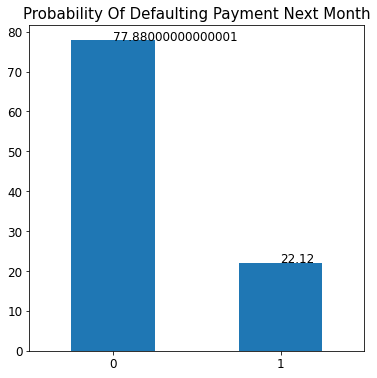

In [10]:
copydfcopy=dataframe.copy() # making a copy
copydfcopy.rename({'default.payment.next.month' : 'DEFAULT'}, axis='columns', inplace=True) # rename some variable for copy

def_cnt = (copydfcopy.DEFAULT.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

Z 30 000 klientów (czyli 22%) 6 636 będzie zalegać z płatnościami w następnym miesiącu. Dane nie wykazują dużej nierównowagi w stosunku do wartości docelowej (default.payment.next.month).

### Eksploracja danych 

###### Podstawowe statystyki opisowe

In [11]:
dataframe.describe().T

count           mean            std       min  \
ID                          30000.0   15000.500000    8660.398374       1.0   
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0      -0.016700       1.123802      -2.0   
PAY_2                       30000.0      -0.133767       1.197186      -2.0   
PAY_3                       30000.0      -0.166200       1.196868      -2.0   
PAY_4                       30000.0      -0.220667       1.169139      -2.0   
PAY_5                       30000.0      -0.266200       1.133187      -2.0   
PAY_6                       30000.0      -0.291100       1.149988      -2.0   
BILL_AMT1                   30000.0   51223.330900   73635.860576 -165580.0   
BILL_AMT2                   30000.0   49179.075167   71173.768783  -69777.0   
BILL_AMT3                   30000.0   47013.154800   69349.387427 -157264.0   
BILL_AMT4                   30000.0   43262.948967   64332.856134 -170000.0   
BILL_AMT5                   30000.0   40311.400967   60797.155770  -81334.0   
BILL_AMT6                   30000.0   38871.760400   59554.107537 -339603.0   
PAY_AMT1                    30000.0    5663.580500   16563.280354       0.0   
PAY_AMT2                    30000.0    5921.163500   23040.870402       0.0   
PAY_AMT3                    30000.0    5225.681500   17606.961470       0.0   
PAY_AMT4                    30000.0    4826.076867   15666.159744       0.0   
PAY_AMT5                    30000.0    4799.387633   15278.305679       0.0   
PAY_AMT6                    30000.0    5215.502567   17777.465775       0.0   
default.payment.next.month  30000.0       0.221200       0.415062       0.0   

                                 25%       50%        75%        max  
ID                           7500.75   15000.5   22500.25    30000.0  
LIMIT_BAL                   50000.00  140000.0  240000.00  1000000.0  
SEX                             1.00       2.0       2.00        2.0  
EDUCATION                       1.00       2.0       2.00        6.0  
MARRIAGE                        1.00       2.0       2.00        3.0  
AGE                            28.00      34.0      41.00       79.0  
PAY_0                          -1.00       0.0       0.00        8.0  
PAY_2                          -1.00       0.0       0.00        8.0  
PAY_3                          -1.00       0.0       0.00        8.0  
PAY_4                          -1.00       0.0       0.00        8.0  
PAY_5                          -1.00       0.0       0.00        8.0  
PAY_6                          -1.00       0.0       0.00        8.0  
BILL_AMT1                    3558.75   22381.5   67091.00   964511.0  
BILL_AMT2                    2984.75   21200.0   64006.25   983931.0  
BILL_AMT3                    2666.25   20088.5   60164.75  1664089.0  
BILL_AMT4                    2326.75   19052.0   54506.00   891586.0  
BILL_AMT5                    1763.00   18104.5   50190.50   927171.0  
BILL_AMT6                    1256.00   17071.0   49198.25   961664.0  
PAY_AMT1                     1000.00    2100.0    5006.00   873552.0  
PAY_AMT2                      833.00    2009.0    5000.00  1684259.0  
PAY_AMT3                      390.00    1800.0    4505.00   896040.0  
PAY_AMT4                      296.00    1500.0    4013.25   621000.0  
PAY_AMT5                      252.50    1500.0    4031.50   426529.0  
PAY_AMT6                      117.75    1500.0    4000.00   528666.0  
default.payment.next.month      0.00       0.0       0.00        1.0

##### Wykres gęstości dla: age, limit_ball

Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


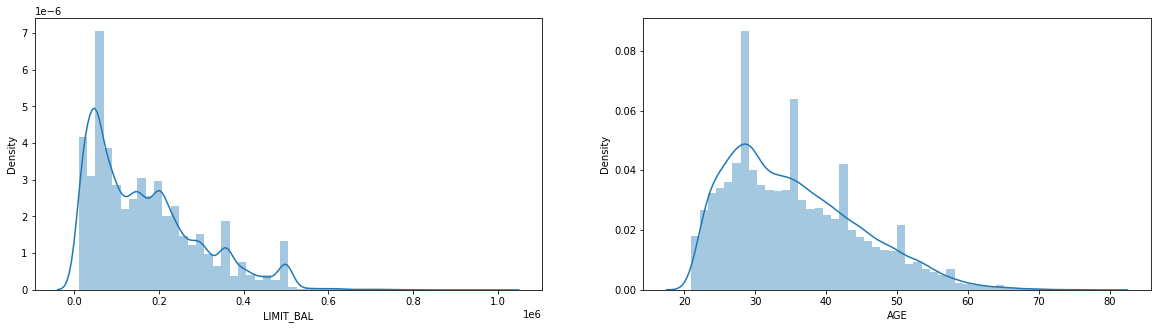

In [12]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(copydfcopy.LIMIT_BAL)

plt.subplot(122)
sns.distplot(copydfcopy.AGE)

plt.show()

Wykresy zmiennych ciągłych pokazują, że zbiór danych składa się ze skośnych danych dotyczących salda granicznego i wieku klientów. Mamy więcej klientów posiadających saldo ograniczające w przedziale od 0 do 200000 waluty. Mamy więcej klientów z 
przedziału wiekowego od 20 do 40 lat, czyli klientów w większości młodych i w średnim wieku. Wpływ zmiennych na zmienną docelową zaobserwujemy poniżej.

##### Proporcje płci

In [13]:
dataframe['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [14]:
dfcopy=dataframe.copy()

In [15]:
def sex1(x): # way with define function for value 1
    if (x==1):
        return "Male"
    else:
        return "Female"
dfcopy['SEX']=dataframe['SEX'].apply(sex1)
# apply apply allows us to define a function that is to be executed sequentially for each row in our df or a particular column

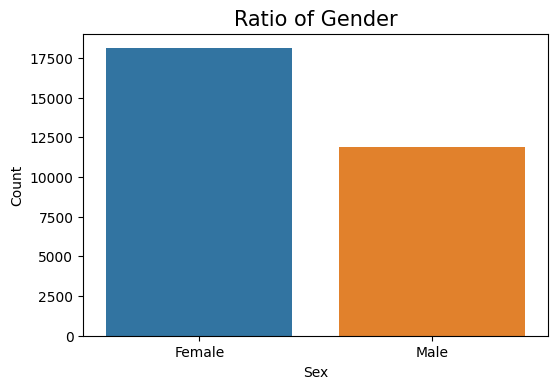

In [16]:
plt.figure(dpi=100)
dfcopy.SEX.value_counts()
sns.countplot(x="SEX", data=dfcopy)
plt.title("Ratio of Gender", size=15)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

In [17]:
def sex2(x):  # way with define function for value 2
    if (x==1):
        return "Female"
    else:
        return "Male"
dfcopy['SEX']=dataframe['SEX'].apply(sex2)

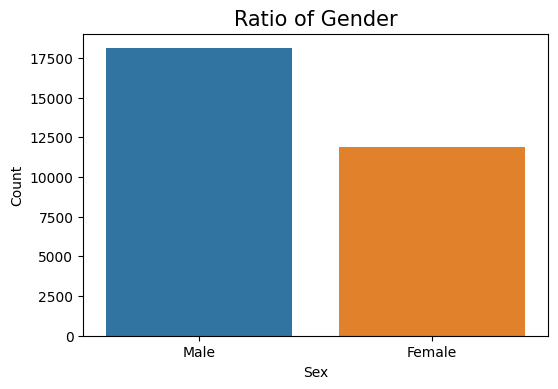

In [18]:
plt.figure(dpi=100)
dfcopy.SEX.value_counts()
sns.countplot(x="SEX", data=dfcopy)
plt.title("Ratio of Gender", size=15)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

##### Wykształcenie względem zmiennej celu

In [19]:
def edu(x):
    if (x==0) or (x==5) or (x==6): # because 4=other, 5=unknown, 6=unknown
        x=4
    return x
dataframe['EDUCATION']=dataframe['EDUCATION'].apply(edu)
dfcopy['EDUCATION']=dfcopy['EDUCATION'].apply(edu)

In [20]:
def edu1(x):
    if (x==1):
        return "Graduate school"
    elif (x==2):
        return "University"
    elif (x==3):
        return "High School"
    else:
        return "Others"
dfcopy['EDUCATION']=dfcopy['EDUCATION'].apply(edu1)

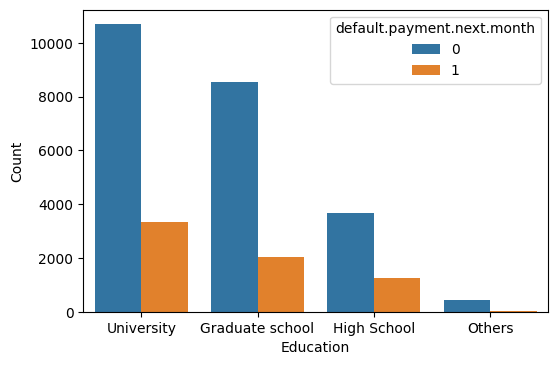

In [21]:
plt.figure(dpi=100)
dfcopy.EDUCATION.value_counts()
sns.countplot(x="EDUCATION", hue="default.payment.next.month", data=dfcopy)
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

##### Status małżeński względem zmiennej celu

In [22]:
def marriage(x):
    if (x==0):
        x=3
    return x
dataframe['MARRIAGE']=dataframe['MARRIAGE'].apply(marriage)
dfcopy['MARRIAGE']=dfcopy['MARRIAGE'].apply(marriage)

In [23]:
def marriage1(x):
    if (x==1):
        return "Married"
    elif (x==2):
        return "Single"
    else:
        return "Others"
dfcopy['MARRIAGE']=dfcopy['MARRIAGE'].apply(marriage1)

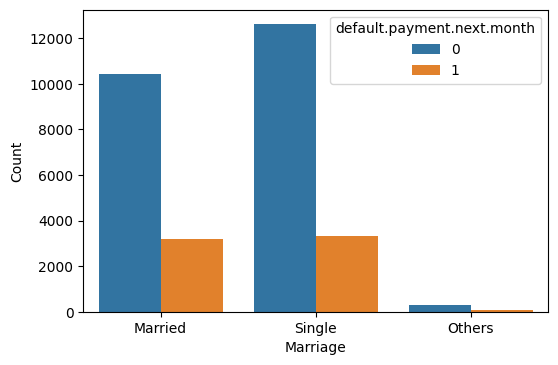

In [24]:
plt.figure(dpi=100)
dfcopy.MARRIAGE.value_counts()
sns.countplot(x="MARRIAGE", hue="default.payment.next.month", data=dfcopy)
plt.xlabel("Marriage")
plt.ylabel("Count")
plt.show()

##### Rozkład wieku

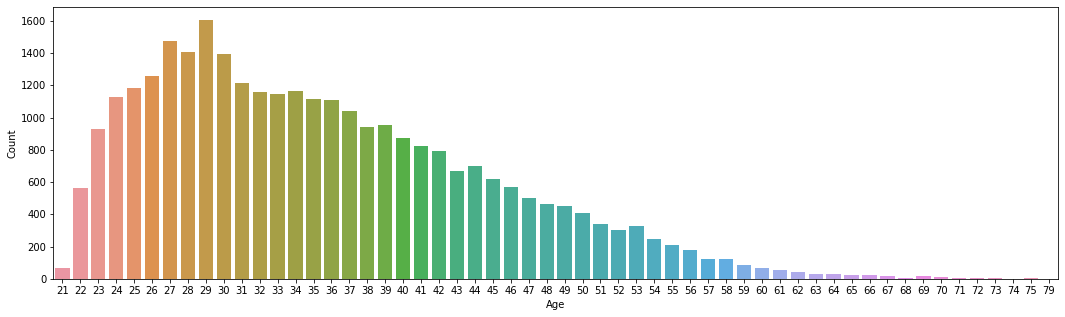

In [25]:
plt.figure(figsize=(18,5))
age=dfcopy['AGE'].value_counts().reset_index()
sns.barplot(x='index',y='AGE',data=age,orient='v')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

##### Kwota limitu kredytowego 

Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


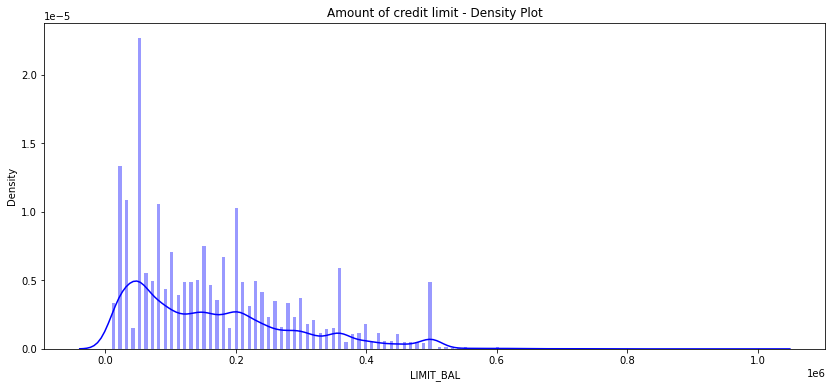

In [26]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(dataframe['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

Największa grupa kwot limitu kredytowego jest mniej więcej na kwotę 50 tys. Sprawdźmy to.

In [27]:
dataframe['LIMIT_BAL'].value_counts().shape

(81,)

Istnieje 81 różnych wartości dla kwoty limitu kredytowego.

In [28]:
dataframe['LIMIT_BAL'].value_counts().head(5)

50000.0     3365
20000.0     1976
30000.0     1610
80000.0     1567
200000.0    1528
Name: LIMIT_BAL, dtype: int64

Najwięcej jest kart kredytowych z limitem 50 000 (3365), następnie z limitem 20 000 (1976) i 30 000 (1610).

##### Kwota limitu kredytowego pogrupowana według zaległości płatniczych w następnym miesiącu  

Zwizualizujmy wykres gęstości dla kwoty limitu kredytowego (LIMIT_BAL), pogrupowanej według domyślnej płatności w następnym miesiącu.

Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


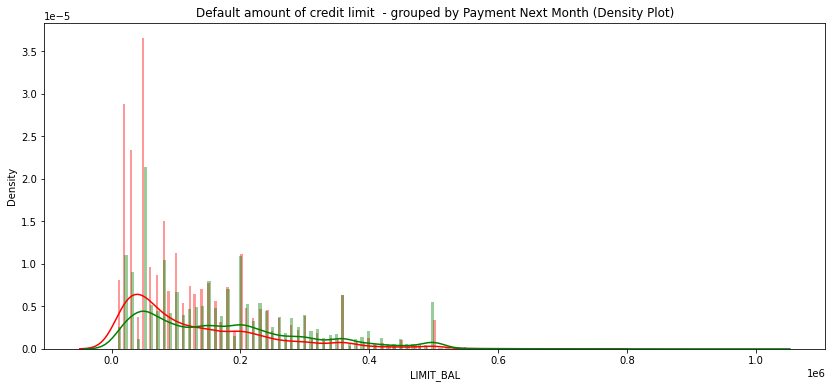

In [29]:
class_0 = dataframe.loc[dataframe['default.payment.next.month'] == 0]["LIMIT_BAL"]
class_1 = dataframe.loc[dataframe['default.payment.next.month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

Większość przypadków niewykonania zobowiązania dotyczy limitów kredytowych 0-100 000. Większa liczba przypadków niewykonania zobowiązania dotyczy kwot 50 000, 20 000 i 30 000.

##### Limit kredytowy a płeć 

Sprawdźmy, jak rozkładają się limity kredytowe w zależności od płci. W przypadku płci 1 oznacza mężczyznę, a 2 - kobietę.

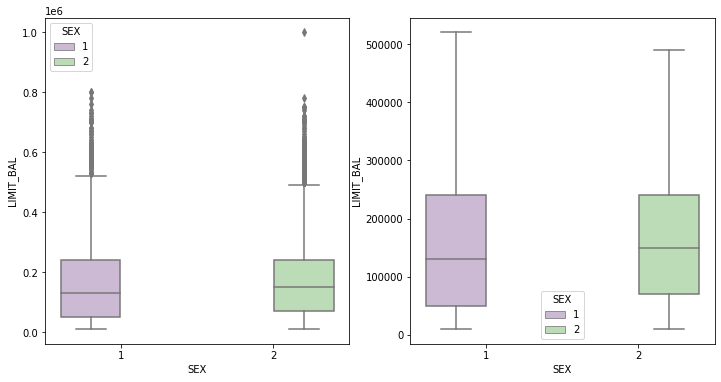

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=dataframe, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=dataframe, palette="PRGn",showfliers=False)
plt.show();

Limit kredytowy jest dość zrównoważony między płciami. Mężczyźni mają nieco mniejszy Q2, a większy Q3 i Q4 oraz niższą średnią. Kobiety mają większą skrajną wartość maksymalną (1 mln NT dolarów).

##### Płeć, wykształcenie, wiek i małżeństwo 

Pokażmy rozkłady płci, wykształcenia, wieku i małżeństwa.

Zaczniemy od przedstawienia wykresów typu boxplot z rozkładem wieku pogrupowanym według stanu cywilnego i płci.

Status małżeński oznacza:

0 : nieznany (uznajmy go za inny) 1 : żonaty 2 : kawaler 3 : inne

Status płci to:

1 : mężczyzna 2 : kobieta

Definiujemy funkcję do boxplotów:

In [31]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=dataframe, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

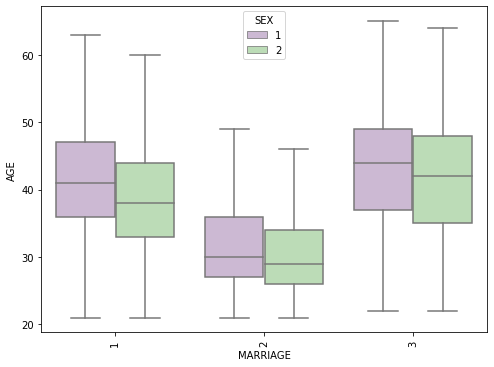

In [32]:
boxplot_variation('MARRIAGE','AGE', 'SEX', 8)

Wygląda na to, że stan cywilny 3 (inni), ze średnimi wartościami powyżej 40 lat i wartościami Q4 powyżej 60 lat oznacza w większości śluby lub rozwody, podczas gdy stan cywilny 0 może oznaczać, że nie jest określony lub rozwiedziony, ponieważ wartości Q1 są powyżej wartości dla żonatych obu płci.

Mężczyźni żonaci mają średnią wieku wyższą od żonatych kobiet. Mężczyźni stanu wolnego również mają średnią wieku wyższą od kobiet stanu wolnego, ale bliższą. Wartości Q3 i Q4 dla żonatych mężczyzn są wyższe od odpowiednich wartości dla żonatych kobiet.

Pokażmy wykresy typu boxplot z rozkładem wieku pogrupowanym według wykształcenia i małżeństwa.

Znaczenie statusu wykształcenia jest następujące:

1 : szkoła wyższa 2 : uniwersytet 3 : szkoła średnia 4 : inne 5 : nieznane 6 : nie wiem

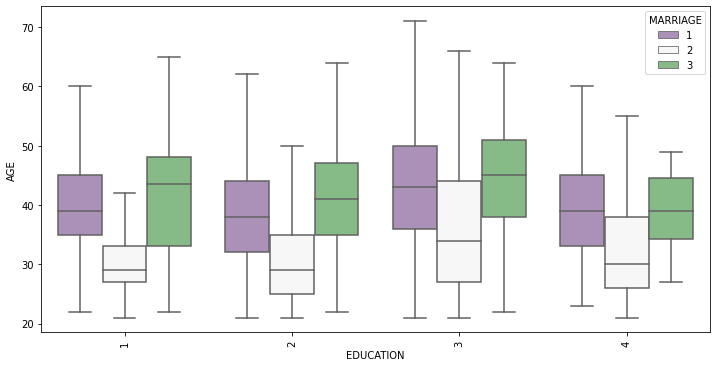

In [33]:
boxplot_variation('EDUCATION','AGE', 'MARRIAGE',12)

##### Wiek, płeć i limit kwoty kredytu

Pokażmy wykresy typu boxplot z rozkładem limitu kwoty kredytu pogrupowanym według wieku i płci.

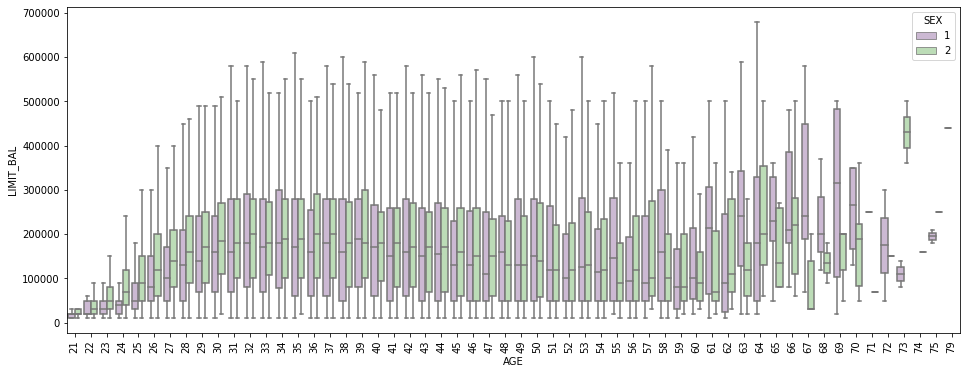

In [34]:
boxplot_variation('AGE','LIMIT_BAL', 'SEX',16)

Wartości średnie, Q3 i Q4 wzrastają u mężczyzn i kobiet wraz z wiekiem do około 35 roku życia, a następnie ulegają wahaniom i osiągają maksimum Q4 dla mężczyzn w wieku 64 lat.

Wartości średnie są na ogół mniejsze u mężczyzn niż u kobiet, z kilkoma wyjątkami, na przykład w wieku 39, 48 i około 60 lat, kiedy to wartości średnie dla mężczyzn są na ogół większe niż dla kobiet.

##### Stan cywilny, poziom wykształcenia i limit kwoty kredytu 

Pokażmy wykresy pudełkowe z rozkładem limitu kwoty kredytu pogrupowanym według stanu cywilnego i poziomu wykształcenia.

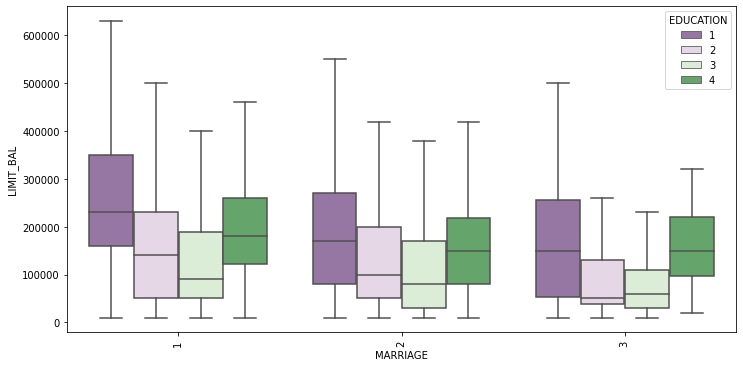

In [35]:
boxplot_variation('MARRIAGE','LIMIT_BAL', 'EDUCATION',12)

##### Outliery

In [36]:
def outlier_capping(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return x
dataframe=dataframe.apply(outlier_capping)
# clip() is used to limit values in an array. Given an interval, values outside the interval are clipped to the interval edges. 
# For example, if an interval of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1.
dataframe # We can see, that dimension is the same

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  \
0        300.99    20000.0    2          2         1  24.0    2.0    2.0   
1        300.99   120000.0    2          2         2  26.0   -1.0    2.0   
2        300.99    90000.0    2          2         2  34.0    0.0    0.0   
3        300.99    50000.0    2          2         1  37.0    0.0    0.0   
4        300.99    50000.0    1          2         1  57.0   -1.0    0.0   
...         ...        ...  ...        ...       ...   ...    ...    ...   
29995  29700.01   220000.0    1          3         1  39.0    0.0    0.0   
29996  29700.01   150000.0    1          3         2  43.0   -1.0   -1.0   
29997  29700.01    30000.0    1          2         2  37.0    3.0    3.0   
29998  29700.01    80000.0    1          3         1  41.0    1.0   -1.0   
29999  29700.01    50000.0    1          2         1  46.0    0.0    0.0   

       PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0       -1.0   -1.0   -2.0   -2.0     3913.0     3102.0      689.0        0.0   
1        0.0    0.0    0.0    2.0     2682.0     1725.0     2682.0     3272.0   
2        0.0    0.0    0.0    0.0    29239.0    14027.0    13559.0    14331.0   
3        0.0    0.0    0.0    0.0    46990.0    48233.0    49291.0    28314.0   
4       -1.0    0.0    0.0    0.0     8617.0     5670.0    35835.0    20940.0   
...      ...    ...    ...    ...        ...        ...        ...        ...   
29995    0.0    0.0    0.0    0.0   188948.0   192815.0   208365.0    88004.0   
29996   -1.0   -1.0    0.0    0.0     1683.0     1828.0     3502.0     8979.0   
29997    2.0   -1.0    0.0    0.0     3565.0     3356.0     2758.0    20878.0   
29998    0.0    0.0    0.0   -1.0      -81.0    78379.0    76304.0    52774.0   
29999    0.0    0.0    0.0    0.0    47929.0    48905.0    49764.0    36535.0   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0            0.0        0.0      0.00     689.0       0.0       0.0       0.0   
1         3455.0     3261.0      0.00    1000.0    1000.0    1000.0       0.0   
2        14948.0    15549.0   1518.00    1500.0    1000.0    1000.0    1000.0   
3        28959.0    29547.0   2000.00    2019.0    1200.0    1100.0    1069.0   
4        19146.0    19131.0   2000.00   36681.0   10000.0    9000.0     689.0   
...          ...        ...       ...       ...       ...       ...       ...   
29995    31237.0    15980.0   8500.00   20000.0    5003.0    3047.0    5000.0   
29996     5190.0        0.0   1837.00    3526.0    8998.0     129.0       0.0   
29997    20582.0    19357.0      0.00       0.0   22000.0    4200.0    2000.0   
29998    11855.0    48944.0  66522.18    3409.0    1178.0    1926.0   52964.0   
29999    32428.0    15313.0   2078.00    1800.0    1430.0    1000.0    1000.0   

       PAY_AMT6  default.payment.next.month  
0           0.0                           1  
1        2000.0                           1  
2        5000.0                           0  
3        1000.0                           0  
4         679.0                           0  
...         ...                         ...  
29995    1000.0                           0  
29996       0.0                           0  
29997    3100.0                           1  
29998    1804.0                           1  
29999    1000.0                           1  

[30000 rows x 25 columns]

##### Korelacja cech

Korelacja wszystkich cech

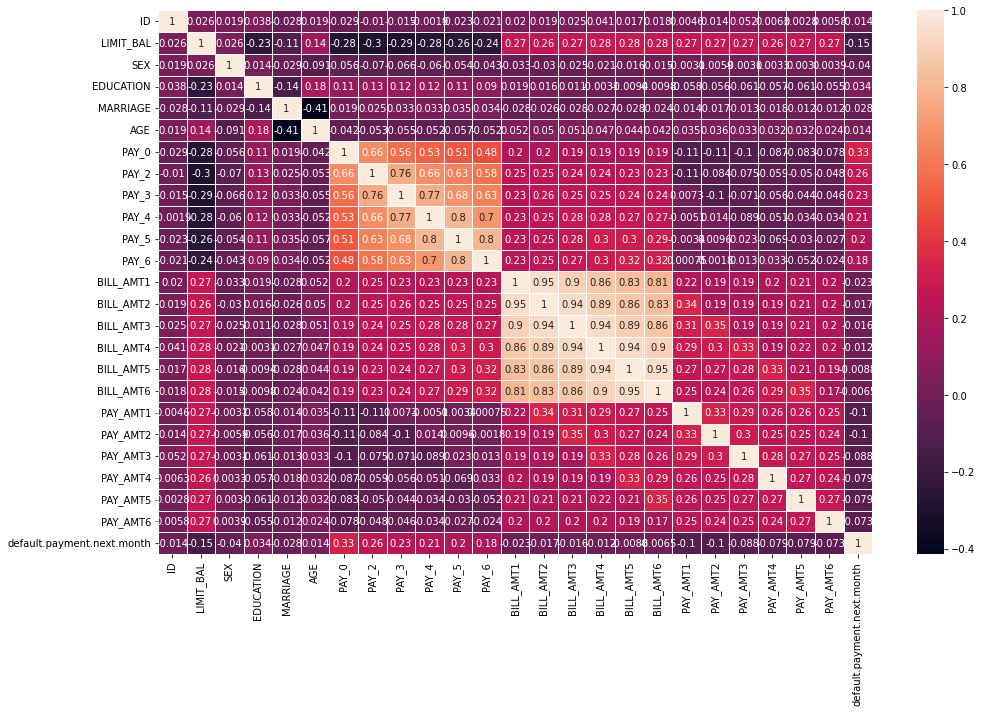

In [37]:
plt.figure (figsize= (16,10))
sns.heatmap(dataframe.corr(),linewidths=.5,annot=True)
plt.show()

W przypadku wartości liczbowych przedstawmy korelację cech.

Sprawdźmy korelację dla kwoty z wyciągu z rachunku za okres kwiecień - wrzesień 2005 r.

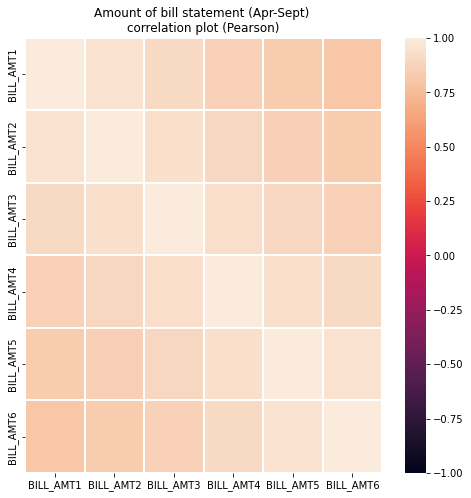

In [38]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = dataframe[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

Korelacja maleje wraz z odległością między miesiącami. Najniższe korelacje występują między wrześniem a kwietniem.

Sprawdźmy korelację dla kwoty poprzedniej płatności w okresie kwiecień - wrzesień 2005.

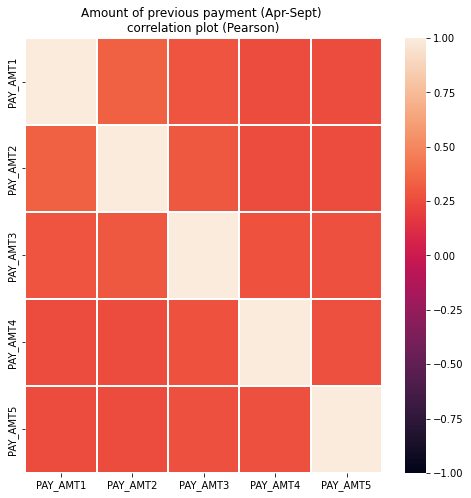

In [39]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (8,8))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')
corr = dataframe[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

Nie ma korelacji między kwotami poprzednich płatności za okres kwiecień-wrzesień 2005 r.

Sprawdźmy korelację między statusem spłaty w okresie kwiecień - wrzesień 2005 r.

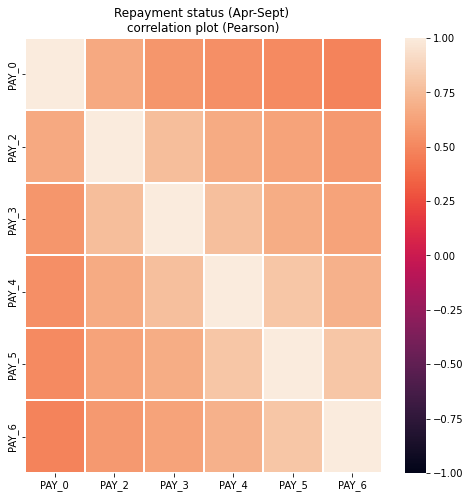

In [40]:
var = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,8))
plt.title('Repayment status (Apr-Sept) \ncorrelation plot (Pearson)')
corr = dataframe[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

Korelacja maleje wraz z odległością między miesiącami. Najniższe korelacje występują w okresie wrzesień-kwiecień.

### Modele predykcyjne 

##### Definiowanie predyktorów i zmiennej celu 

Zdefiniujmy predyktory i zmienną celu. Definiuje się również cechy kategoryczne, jeśli takie istnieją. W naszym przypadku nie ma cech kategorycznych.

In [41]:
target = 'default.payment.next.month'
predictors = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

##### Podział danych na zbiór treningowy i walidacyjny 

Zdefiniujmy zbiory: treningowy, testowy i walidacyjny.

In [42]:
train_df, val_df = train_test_split(dataframe, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

Wykonujemy również kopie train_df i val_df do późniejszego wykorzystania.

In [43]:
train_df_bkp = train_df.copy()
val_df_bkp = val_df.copy()

Zacznijmy od modelu RandomForrestClassifier.

##### Lasy losowe - model 1

Utworzymy model, używając zbioru treningowego do trenowania, a następnie użyjemy zbioru walidacyjnego do walidacji.

Metryki

Jako kryterium walidacji zastosujemy GINI, którego wzór to: GINI = 2 * (AUC) - 1, gdzie wskaźnik AUC (Receiver Operating Characteristic) to obszar pod krzywą ROC. Liczbę estymatorów ustalono na 100, a parallel jobs na 4.

Rozpoczynamy od inicjalizacji klasyfikatora RandomForestClassifier.

Uwaga - przypomnienie:

Krzywa ROC odzwierciedla relacje pomiędzy wartościami FPR (czyli False Positive Rate), a TPR (czyli True Positive Rate). Obszar znajdujący się pod krzywą ROC nazywany jest błędem AUC i jest to miara wydajności klasyfikatora dla wszystkich wartości progowych. Metryka ta przyjmuje wartości z zakresu od 0 do 1, gdzie wartożsci bliższe 1 oznacza, że krzywa ROC zbliża się ku lewemu górnemu narożnikowi wykresu. Wartość tą interpretujemy, że dal wysokiej wartości AUC model oceni wyżej losowy pozytywny przypadek, niż losowy negatywny dla klasyfikacji w danej klasie.

In [44]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

Przetrenujmy klasyfikator RandomForestClassifier, używając danych train_df i funkcji fit.

In [45]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

Predykujmy teraz wartości docelowe dla danych val_df, używając funkcji predict.

In [46]:
preds = clf.predict(val_df[predictors])

Zwizualizujmy także ważność cech.

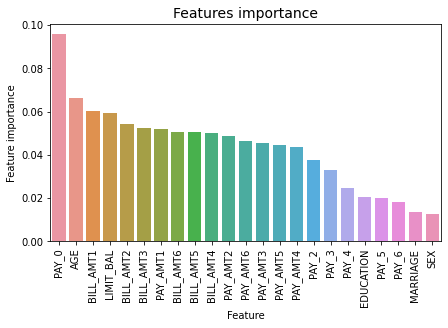

In [47]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

Widzimy, że najistotniejszymi zmiennymi są: PAY_0, AGE, BILL_AMT1, LIMIT_BAL, BILL_AMT2, BILL_AMT3.

Macierz pomyłek

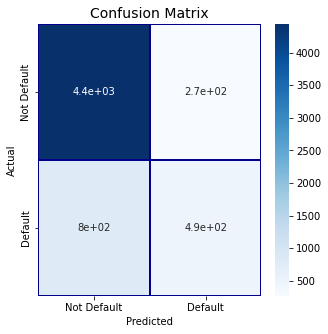

In [48]:
cm = pd.crosstab(val_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Obliczamy również pole powierzchni pod krzywą ROC, a więc AUC.

In [49]:
roc_auc_score(val_df[target].values, preds)

0.6620464869755979

Wartość AUC wynosi około 0.66.

##### Lasy losowe - model 2 (OneHotEncoding)

In [50]:
cat_features = ['EDUCATION', 'SEX', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [51]:
train_f_df = pd.get_dummies(train_df_bkp, columns = cat_features)
val_f_df = pd.get_dummies(val_df_bkp, columns = cat_features)

In [52]:
print("Default of Credit Card Clients train data -  rows:",train_f_df.shape[0]," columns:", train_f_df.shape[1])
print("Default of Credit Card Clients val  data -  rows:",val_f_df.shape[0]," columns:", val_f_df.shape[1])

Default of Credit Card Clients train data -  rows: 24000  columns: 59
Default of Credit Card Clients val  data -  rows: 6000  columns: 57


Ponieważ dane treningowe i walidacyjne nie mają tej samej liczby kolumn, wyrównamy je.

In [53]:
train_fa_df, val_fa_df = train_f_df.align(val_f_df, join='outer', axis=1, fill_value=0)

Sprawdzenie ponowne danych:

In [54]:
print("Default of Credit Card Clients train data -  rows:",train_fa_df.shape[0]," columns:", train_fa_df.shape[1])
print("Default of Credit Card Clients val  data -  rows:",val_fa_df.shape[0]," columns:", val_fa_df.shape[1])

Default of Credit Card Clients train data -  rows: 24000  columns: 59
Default of Credit Card Clients val  data -  rows: 6000  columns: 59


In [55]:
train_fa_df.head(5)

AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
22659  48.0   175095.0   175522.0   173918.0   174074.0   178671.0   178869.0   
6618   37.0     8788.0    40927.0    28306.0    31578.0    21195.0    11776.0   
26605  23.0     2400.0     2400.0     2400.0     2400.0     2400.0     1800.0   
2504   30.0      440.0    30404.0        0.0      880.0      150.0      430.0   
1111   44.0     3424.0      155.0     1922.0     1473.0     1865.0      835.0   

       EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4       ID  LIMIT_BAL  \
22659            0            0            1            0  22660.0   150000.0   
6618             0            1            0            0   6619.0   180000.0   
26605            0            1            0            0  26606.0    20000.0   
2504             0            1            0            0   2505.0   180000.0   
1111             0            0            1            0   1112.0    50000.0   

       MARRIAGE_1  MARRIAGE_2  MARRIAGE_3  PAY_0_-1.0  PAY_0_-2.0  PAY_0_0.0  \
22659           0           1           0           0           0          1   
6618            0           1           0           1           0          0   
26605           0           1           0           0           0          0   
2504            0           1           0           1           0          0   
1111            1           0           0           1           0          0   

       PAY_0_1.0  PAY_0_2.0  PAY_0_3.0  PAY_2_-1.0  PAY_2_-2.0  PAY_2_0.0  \
22659          0          0          0           0           0          1   
6618           0          0          0           1           0          0   
26605          0          0          1           0           0          0   
2504           0          0          0           1           0          0   
1111           0          0          0           1           0          0   

       PAY_2_1.0  PAY_2_2.0  PAY_2_3.0  PAY_3_-1.0  PAY_3_-2.0  PAY_3_0.0  \
22659          0          0          0           0           0          1   
6618           0          0          0           0           0          1   
26605          0          1          0           0           0          0   
2504           0          0          0           1           0          0   
1111           0          0          0           1           0          0   

       PAY_3_1.0  PAY_3_2.0  PAY_3_3.0  PAY_4_-1.0  PAY_4_-2.0  PAY_4_0.0  \
22659          0          0          0           0           0          1   
6618           0          0          0           0           0          1   
26605          0          1          0           0           0          0   
2504           0          0          0           1           0          0   
1111           0          0          0           1           0          0   

       PAY_4_1.0  PAY_4_2.0  PAY_4_3.0  PAY_5_-1.0  PAY_5_-2.0  PAY_5_0.0  \
22659          0          0          0           0           0          1   
6618           0          0          0           0           0          1   
26605          0          0          1           0           0          0   
2504           0          0          0           1           0          0   
1111           0          0          0           1           0          0   

       PAY_5_2.0  PAY_5_3.0  PAY_6_-1.0  PAY_6_-2.0  PAY_6_0.0  PAY_6_2.0  \
22659          0          0           0           0          1          0   
6618           0          0           1           0          0          0   
26605          0          1           0           0          0          0   
2504           0          0           1           0          0          0   
1111           0          0           1           0          0          0   

       PAY_6_3.0  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
22659          0   10011.0    6200.0    5874.0   10000.0    6054.0   7108.00   
6618           0   40970.0    1210.0   10015.0   10009.0   11783.0  82619.05  

In [56]:
val_fa_df.head(5)

AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
8343   30.0   37522.00   38614.00   39671.00   40213.00   41064.00   43382.00   
2228   29.0   53274.00   54093.00   53111.00   50568.00   47791.00   45421.00   
6293   55.0    2326.00    4917.00    4906.00    4707.00    2254.00    5375.00   
16805  43.0    4166.00    4166.00    4216.00    4166.00    4166.00    4166.00   
3519   34.0  350110.68  337495.28  325030.39  304997.27  285868.33  279505.06   

       EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4       ID  LIMIT_BAL  \
8343             0            1            0            0   8344.0    50000.0   
2228             0            1            0            0   2229.0    60000.0   
6293             1            0            0            0   6294.0   280000.0   
16805            0            0            1            0  16806.0    50000.0   
3519             0            1            0            0   3520.0   500000.0   

       MARRIAGE_1  MARRIAGE_2  MARRIAGE_3  PAY_0_-1.0  PAY_0_-2.0  PAY_0_0.0  \
8343            0           1           0           0           0          1   
2228            0           1           0           0           0          1   
6293            1           0           0           1           0          0   
16805           0           1           0           1           0          0   
3519            1           0           0           0           0          1   

       PAY_0_1.0  PAY_0_2.0  PAY_0_3.0  PAY_2_-1.0  PAY_2_-2.0  PAY_2_0.0  \
8343           0          0          0           0           0          1   
2228           0          0          0           0           0          1   
6293           0          0          0           1           0          0   
16805          0          0          0           1           0          0   
3519           0          0          0           0           0          1   

       PAY_2_1.0  PAY_2_2.0  PAY_2_3.0  PAY_3_-1.0  PAY_3_-2.0  PAY_3_0.0  \
8343           0          0          0           0           0          1   
2228           0          0          0           0           0          1   
6293           0          0          0           0           0          1   
16805          0          0          0           1           0          0   
3519           0          0          0           0           0          1   

       PAY_3_1.0  PAY_3_2.0  PAY_3_3.0  PAY_4_-1.0  PAY_4_-2.0  PAY_4_0.0  \
8343           0          0          0           0           0          1   
2228           0          0          0           0           0          1   
6293           0          0          0           0           0          1   
16805          0          0          0           0           0          1   
3519           0          0          0           0           0          1   

       PAY_4_1.0  PAY_4_2.0  PAY_4_3.0  PAY_5_-1.0  PAY_5_-2.0  PAY_5_0.0  \
8343           0          0          0           0           0          1   
2228           0          0          0           0           0          1   
6293           0          0          0           0           0          0   
16805          0          0          0           1           0          0   
3519           0          0          0           0           0          1   

       PAY_5_2.0  PAY_5_3.0  PAY_6_-1.0  PAY_6_-2.0  PAY_6_0.0  PAY_6_2.0  \
8343           0          0           0           0          1          0   
2228           0          0           0           0          1          0   
6293           1          0           1           0          0          0   
16805          0          0           1           0          0          0   
3519           0          0           0           0          1          0   

       PAY_6_3.0  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
8343           0    2000.0    2000.0    1500.0    1500.0    3000.0    2000.0   
2228           0    2591.0    2109.0    1705.0    2010.0    2000.0    1523.0  

Definiowanie predyktorów i zmiennej celu

In [57]:
target_f = 'default.payment.next.month'
predictors_f = ['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'LIMIT_BAL', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6', 'SEX_1', 'SEX_2']

Trenowanie analogiczne jak dla 1. modelu

In [58]:
train_fa_df[predictors_f]

AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
22659  48.0   175095.0   175522.0   173918.0   174074.0   178671.0   178869.0   
6618   37.0     8788.0    40927.0    28306.0    31578.0    21195.0    11776.0   
26605  23.0     2400.0     2400.0     2400.0     2400.0     2400.0     1800.0   
2504   30.0      440.0    30404.0        0.0      880.0      150.0      430.0   
1111   44.0     3424.0      155.0     1922.0     1473.0     1865.0      835.0   
...     ...        ...        ...        ...        ...        ...        ...   
17301  41.0    47739.0    47481.0    47066.0    44367.0    27496.0    27677.0   
19209  30.0        0.0        0.0        0.0        0.0        0.0        0.0   
14562  39.0    47739.0    46712.0    45660.0    48905.0    47993.0    52015.0   
27238  42.0    11204.0    17587.0    17405.0    20207.0    23308.0    26406.0   
9466   51.0    39943.0    40859.0    45398.0    50634.0    60540.0    65074.0   

       EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  LIMIT_BAL  \
22659            0            0            1            0   150000.0   
6618             0            1            0            0   180000.0   
26605            0            1            0            0    20000.0   
2504             0            1            0            0   180000.0   
1111             0            0            1            0    50000.0   
...            ...          ...          ...          ...        ...   
17301            1            0            0            0    50000.0   
19209            1            0            0            0   210000.0   
14562            0            1            0            0   240000.0   
27238            0            0            1            0    80000.0   
9466             0            1            0            0   350000.0   

       MARRIAGE_1  MARRIAGE_2  MARRIAGE_3  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
22659           0           1           0   10011.0    6200.0    5874.0   
6618            0           1           0   40970.0    1210.0   10015.0   
26605           0           1           0       0.0       0.0       0.0   
2504            0           1           0   30404.0       0.0     880.0   
1111            1           0           0     155.0    1922.0    1473.0   
...           ...         ...         ...       ...       ...       ...   
17301           1           0           0    2000.0    1817.0    2000.0   
19209           0           1           0       0.0       0.0       0.0   
14562           1           0           0       0.0       0.0    4000.0   
27238           0           1           0    6922.0     441.0    3450.0   
9466            0           1           0    1859.0    5398.0    5634.0   

       PAY_AMT4  PAY_AMT5  PAY_AMT6  SEX_1  SEX_2  
22659   10000.0    6054.0   7108.00      0      1  
6618    10009.0   11783.0  82619.05      1      0  
26605       0.0       0.0      0.00      1      0  
2504      150.0     430.0    747.00      1      0  
1111     1865.0     835.0   1833.00      0      1  
...         ...       ...       ...    ...    ...  
17301    1500.0    1001.0   1010.00      0      1  
19209       0.0       0.0      0.00      0      1  
14562       0.0    5000.0   2000.00      0      1  
27238    3541.0    3545.0   3649.00      1      0  
9466    10540.0    5096.0   2296.00      1      0  

[24000 rows x 23 columns]

In [59]:
clf.fit(train_fa_df[predictors_f], train_df[target_f].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

In [60]:
preds = clf.predict(val_fa_df[predictors_f])

Feature importance

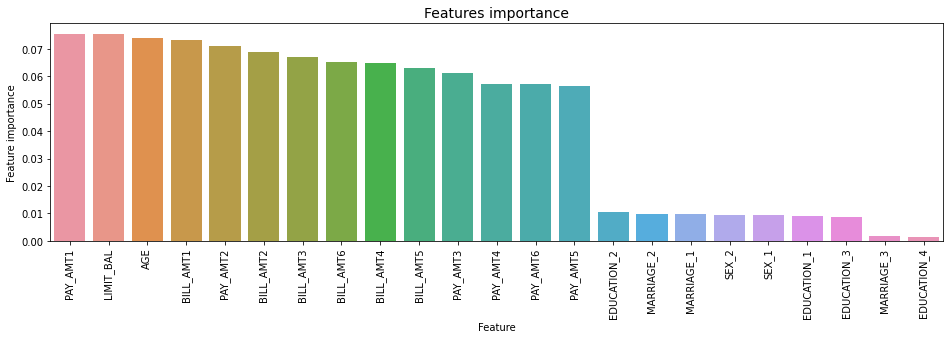

In [61]:
tmp = pd.DataFrame({'Feature': predictors_f, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (16,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

Najważniejsze cechy to AGE, LIMIT_BAL, BILL_AMT1, PAY_0_2, BILL_AMT2, BILL_AMT3.

Macierz pomyłek

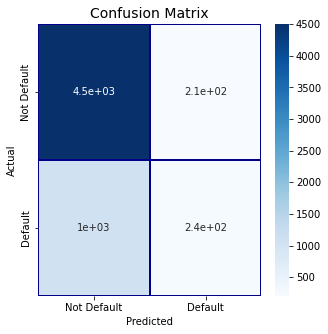

In [62]:
cm = pd.crosstab(val_fa_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [63]:
roc_auc_score(val_fa_df[target].values, preds)

0.5725495895268182

Widzimy, że w tym przypadku wynik AUC nic nie pomógł.

##### Xgboost - model 1

Przygotowywanie modelu - inicjalizujemy obiekty DMatrix na potrzeby trenowania i walidacji, zaczynając od zbiorów danych. Ustawiamy także niektóre parametry używane do dostrajania modelu.

In [64]:
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(val_df[predictors], val_df[target].values)

# Watch list composed of 'train' and 'valid'
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

Trenowanie modelu

In [65]:
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[16:39:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.69220	valid-auc:0.69740


Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[50]	train-auc:0.76847	valid-auc:0.76489
[100]	train-auc:0.77715	valid-auc:0.77270
[150]	train-auc:0.78295	valid-auc:0.77658
[200]	train-auc:0.78697	valid-auc:0.77946
[250]	train-auc:0.78998	valid-auc:0.78077
[300]	train-auc:0.79213	valid-auc:0.78159
[350]	train-auc:0.79438	valid-auc:0.78266
[400]	train-auc:0.79631	valid-auc:0.78323
[450]	train-auc:0.79817	valid-auc:0.78372
[500]	train-auc:0.79996	valid-auc:0.78386
[550]	train-auc:0.80170	valid-auc:0.78377
[576]	train-auc:0.80255	valid-auc:0.78372


Najlepszy wynik walidacyjny AUC wynosi 0.78.

Wykres istotności zmiennych

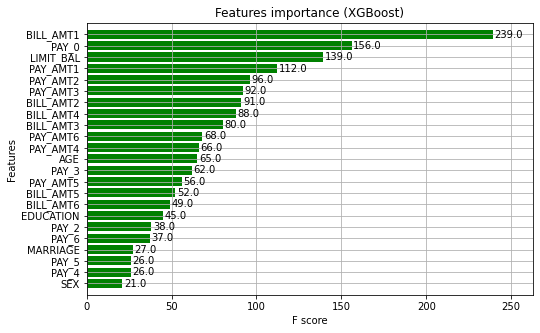

In [66]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

##### Lightgbm - model 1

Definiowanie parametrów modelu 

In [67]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':50, # because training data is sightly unbalanced 
         }

Przygotowywanie modelu - zdefiniowanie cech kategorycznych

In [68]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

Przygotujmy model, tworząc zbiory: treningowy i walidacyjny.
Zainicjalizujemy również Datasets listą cech kategorycznych (lgb ma specjalne traktowanie wartości kategorycznych).

In [69]:
dtrain = lgb.Dataset(train_df[predictors].values, 
                     label=train_df[target].values,
                     feature_name=predictors,
                     categorical_feature=categorical_features)

dvalid = lgb.Dataset(val_df[predictors].values,
                     label=val_df[target].values,
                     feature_name=predictors,
                     categorical_feature=categorical_features)

Uruchamiamy model, używając funkcji train

In [70]:
evals_results = {}

model = lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train','valid'], 
                  evals_result=evals_results, 
                  num_boost_round=MAX_ROUNDS,
                  early_stopping_rounds=EARLY_STOP,
                  verbose_eval=VERBOSE_EVAL, 
                  feval=None)

del dvalid
gc.collect()

Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\lightgbm\engine.py:260: UserWar

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.778635	valid's auc: 0.771989
[100]	train's auc: 0.788417	valid's auc: 0.781685
[150]	train's auc: 0.794076	valid's auc: 0.784476
[200]	train's auc: 0.799273	valid's auc: 0.784609
[250]	train's auc: 0.803995	valid's auc: 0.784063
Early stopping, best iteration is:
[222]	train's auc: 0.801603	valid's auc: 0.78497


1908801

Najlepszy wynik walidacji uzyskano dla iteracji 135, dla której AUC ~= 0,78.

Wykres istotności zmiennych

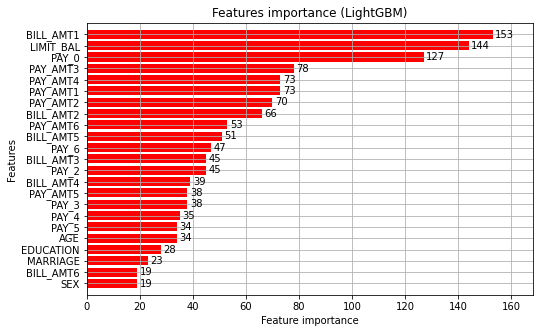

In [71]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(model, height=0.8, title="Features importance (LightGBM)", ax=ax,color="red") 
plt.show()

Trenowanie i walidacja z użyciem kroswalidacji - użyjemy walidacji krzyżowej (KFolds) z 5 foldami. Dane są podzielone na 5 foldów i trenujemy z wykorzystaniem 4 foldów (n-1), a walidujemy z wykorzystaniem piątego (n-tego) foldu.

In [72]:
kf = KFold(n_splits = NUMBER_KFOLDS, random_state = RANDOM_STATE, shuffle = True)
for train_index, test_index in kf.split(dataframe):
    train_X, valid_X = dataframe.iloc[train_index], dataframe.iloc[test_index]

    dtrain = lgb.Dataset(train_X[predictors].values, label=train_X[target].values,
                     feature_name=predictors)

    dvalid = lgb.Dataset(valid_X[predictors].values, label=valid_X[target].values,
                     feature_name=predictors)

    evals_results = {}
    model =  lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train','valid'], 
                  evals_result=evals_results, 
                  num_boost_round=MAX_ROUNDS,
                  early_stopping_rounds=EARLY_STOP,
                  verbose_eval=VERBOSE_EVAL, 
                  feval=None)

Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001881 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.77899	valid's auc: 0.772945
[100]	train's auc: 0.788766	valid's auc: 0.780891
[150]	train's auc: 0.794301	valid's auc: 0.784117
[200]	train's auc: 0.799577	valid's auc: 0.784938
[250]	train's auc: 0.803806	valid's auc: 0.784923
Early stopping, best iteration is:
[211]	train's auc: 0.800387	valid's auc: 0.785132


Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001748 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.780553	valid's auc: 0.76399
[100]	train's auc: 0.79014	valid's auc: 0.772765
[150]	train's auc: 0.796413	valid's auc: 0.776931
[200]	train's auc: 0.8022	valid's auc: 0.777762
[250]	train's auc: 0.806716	valid's auc: 0.77853
Early stopping, best iteration is:
[231]	train's auc: 0.804924	valid's auc: 0.778911
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001588 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.778215	valid's auc: 0.782139


Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'

[100]	train's auc: 0.787198	valid's auc: 0.787886
[150]	train's auc: 0.793691	valid's auc: 0.789521
[200]	train's auc: 0.798771	valid's auc: 0.790181
[250]	train's auc: 0.803051	valid's auc: 0.790047
Early stopping, best iteration is:
[212]	train's auc: 0.799709	valid's auc: 0.790537
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001643 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.778175	valid's auc: 0.772251


Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'

[100]	train's auc: 0.788892	valid's auc: 0.779791
[150]	train's auc: 0.795475	valid's auc: 0.781399
[200]	train's auc: 0.800563	valid's auc: 0.781235
Early stopping, best iteration is:
[185]	train's auc: 0.799201	valid's auc: 0.78169
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001648 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.778824	valid's auc: 0.77315


Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'

[100]	train's auc: 0.788601	valid's auc: 0.780873
[150]	train's auc: 0.795021	valid's auc: 0.783348
[200]	train's auc: 0.799909	valid's auc: 0.784963
Early stopping, best iteration is:
[191]	train's auc: 0.798907	valid's auc: 0.785078


Średnia wartość AUC walidacji dla 5 uzyskanych foldów wyniosła 0.78, przy czym wartości te mieściły się w przedziale od 0.778 do 0.79.

##### Wnioski 

Zbadaliśmy dane, sprawdzając, czy nie są one niezbalansowane, wizualizując cechy i rozumiejąc zależności między różnymi cechami.

Następnie zbadaliśmy trzy modele predykcyjne:

* Lasy losowe
* XGBoost  
* LightGBM 

* Zaczęliśmy od RandomForrestClassifier, dla którego uzyskaliśmy współczynnik AUC równy 0,66. 

* Następnie eksperymentowaliśmy z modelem XGBoost, dla którego uzyskany wynik AUC wyniósł 0,78.

* Następnie dane zostały poddane działaniu modelu LightGBM. Do oceny skuteczności modelu w przewidywaniu wartości docelowej, tj. wykrywaniu, czy klient karty kredytowej będzie zalegał z płatnościami w następnym miesiącu, zastosowaliśmy zarówno metodę train-validation split, jak i cross-validation. W przypadku obu metod dla modelu LightGBM uzyskane wartości AUC dla zbioru walidacyjnego wyniosły również około 0.78.

* Dwa ostatnie wnioski potwierdzają, że wyniki z Xgboost są zwykle bardzo zbliżone do wyników z LightGBM.

##### SVM - model 1

Zmiana nazwy ostaniej zmiennej 

In [73]:
dataframe.rename({'default.payment.next.month' : 'DEFAULT'}, axis='columns', inplace=True)
dataframe.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  \
0  300.99    20000.0    2          2         1  24.0    2.0    2.0   -1.0   
1  300.99   120000.0    2          2         2  26.0   -1.0    2.0    0.0   
2  300.99    90000.0    2          2         2  34.0    0.0    0.0    0.0   
3  300.99    50000.0    2          2         1  37.0    0.0    0.0    0.0   
4  300.99    50000.0    1          2         1  57.0   -1.0    0.0   -1.0   

   PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0   -1.0   -2.0   -2.0     3913.0     3102.0      689.0        0.0        0.0   
1    0.0    0.0    2.0     2682.0     1725.0     2682.0     3272.0     3455.0   
2    0.0    0.0    0.0    29239.0    14027.0    13559.0    14331.0    14948.0   
3    0.0    0.0    0.0    46990.0    48233.0    49291.0    28314.0    28959.0   
4    0.0    0.0    0.0     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4    19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0   

   DEFAULT  
0        1  
1        1  
2        0  
3        0  
4        0

Usunięcie zmiennej ID

In [74]:
dataframe.drop('ID', axis=1, inplace=True) # set axis=0 -> remove rows, axis=1 -> remove columns
dataframe.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1  24.0    2.0    2.0   -1.0   -1.0   
1   120000.0    2          2         2  26.0   -1.0    2.0    0.0    0.0   
2    90000.0    2          2         2  34.0    0.0    0.0    0.0    0.0   
3    50000.0    2          2         1  37.0    0.0    0.0    0.0    0.0   
4    50000.0    1          2         1  57.0   -1.0    0.0   -1.0    0.0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0   -2.0   -2.0     3913.0     3102.0      689.0        0.0        0.0   
1    0.0    2.0     2682.0     1725.0     2682.0     3272.0     3455.0   
2    0.0    0.0    29239.0    14027.0    13559.0    14331.0    14948.0   
3    0.0    0.0    46990.0    48233.0    49291.0    28314.0    28959.0   
4    0.0    0.0     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4    19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0   

   DEFAULT  
0        1  
1        1  
2        0  
3        0  
4        0

Sprawdzenie typów danych, braków danych, rozwiązanie ich problemu itp

In [75]:
dataframe.dtypes
# website with acceptable values in each column: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE          float64
PAY_0        float64
PAY_2        float64
PAY_3        float64
PAY_4        float64
PAY_5        float64
PAY_6        float64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

In [76]:
dataframe['SEX'].unique() # SEX contains only the numbers 1 and 2, is good

array([2, 1], dtype=int64)

In [77]:
dataframe['EDUCATION'].unique() 
# in addition to the allowed numbers, 1, 2, 3, and 4, EDUCATION also contains 0, 5 and 6. It is possible that 0 represents 
# missing data and 5 and 6 represent categories not mentioned in the specification

array([2, 1, 3, 4], dtype=int64)

In [78]:
dataframe['MARRIAGE'].unique() # Like EDUCATION, MARRIAGE contains 0, it can represents missing data

array([1, 2, 3], dtype=int64)

In [79]:
# It caused by the fact, that SVM do not support datasets with missing values, we need to figure out what to do with the 0s in 
# the dataset. We can either delete these customers from the training dataset, or impute values for the missing data. First 
# let's see how many rows contain missing values.
len(dataframe.loc[(dataframe['EDUCATION'] == 0) | (dataframe['MARRIAGE'] == 0)])

0

In [80]:
len(dataframe) # So 68 of the 30,000 rows, or less than 1%, contain missing values. Since that still leaves us with more data 
# than we need for a Support Vector Machine, will remove the rows with missing values.

30000

In [81]:
df_no_missing = dataframe.loc[(dataframe['EDUCATION'] != 0) & (dataframe['MARRIAGE'] != 0)]
len(df_no_missing) # we see that we have 29,932 rows

30000

Downsampling data

In [82]:
# SVM są świetne w przypadku małych zbiorów danych, ale nie są rewelacyjne w przypadku dużych zbiorów, a ten zbiór danych, 
# choć nie jest ogromny, jest wystarczająco duży, aby optymalizacja za pomocą walidacji krzyżowej zajęła dużo czasu. 
# Dlatego zmniejszamy próbę obu kategorii - klientów, którzy nie wywiązali się z umowy, i klientów, którzy nie wywiązali się z 
# umowy - do 1000 osób.
df_no_default = df_no_missing[df_no_missing['DEFAULT'] == 0]
df_default = df_no_missing[df_no_missing['DEFAULT'] == 1]
# More information about downsampling etc is here: 
# https://towardsdatascience.com/5-techniques-to-work-with-imbalanced-data-in-machine-learning-80836d45d30c

In [83]:
# Downsampling for df_no_default:
df_no_default_downsampled = resample(df_no_default,
                                  replace=False,
                                  n_samples=1000,
                                  random_state=42)
len(df_no_default_downsampled)

1000

In [84]:
# Downsampling for df_default:
df_default_downsampled = resample(df_default,
                                  replace=False,
                                  n_samples=1000,
                                  random_state=42)
len(df_default_downsampled)

1000

In [85]:
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled])
len(df_downsample) # merge the two downsampled datasets into a single dataframe

2000

Format Data: Split the Data into Dependent and Independent Variables, One-Hot Encoding and Scaling

In [86]:
# Split the data into two parts: 
# The columns of data that we will use to make classifications and The column of data that we want to predict
X = df_downsample.drop('DEFAULT', axis=1).copy() # alternatively: X = df_no_missing.iloc[:,:-1].copy()
X.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
7510    380000.0    2          3         2  31.0   -1.0   -1.0   -1.0   -1.0   
15325   240000.0    2          2         1  35.0   -2.0   -2.0   -2.0   -2.0   
18666    50000.0    2          1         2  23.0   -1.0   -1.0   -2.0   -2.0   
7494    330000.0    1          1         2  32.0    0.0    0.0    0.0    0.0   
1239     80000.0    2          2         1  35.0   -1.0   -1.0   -1.0   -1.0   

       PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
7510    -1.0   -1.0     3859.0     9194.0    15157.0    11147.0    12483.0   
15325   -2.0   -2.0     5391.0     7375.0     4908.0     5638.0     2582.0   
18666   -2.0   -2.0     2332.0        0.0        0.0        0.0        0.0   
7494     0.0    0.0   162657.0   151305.0   138277.0   141453.0   112633.0   
1239    -1.0    0.0     2890.0     9796.0    13443.0      396.0      396.0   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
7510     13680.0    9240.0   15233.0   11202.0   12493.0   13748.0   18061.0  
15325     4127.0    7375.0    4908.0    5638.0    2587.0    4127.0    4942.0  
18666        0.0       0.0       0.0       0.0       0.0       0.0       0.0  
7494    121242.0    5500.0    4723.0    5500.0    4000.0   10700.0    4500.0  
1239       396.0    9796.0   13443.0     396.0     396.0       0.0     396.0

In [87]:
y = df_downsample['DEFAULT'].copy()
y.head()

7510     0
15325    0
18666    0
7494     0
1239     0
Name: DEFAULT, dtype: int64

In [88]:
# Attention: function copy() is to copy the data by value. By default, pandas uses copy by reference. Using copy() ensures that 
# the original data df_downsample is not modified when we modify X or y. In other words, if we make a mistake when we are 
# formatting the columns for classification trees, we can just re-copy df_downsample, rather than reload the original data and 
# remove the missing values etc

In [89]:
# So it looks like SEX, EDUCATION, MARRIAGE and PAY_ are supposed to be categorical and need to be modified. This is because, 
# while scikit learn Support Vector Machines natively support continuous data, like LIMIT_BAL and AGE, they do not natively 
# support categorical data, like MARRIAGE, which contains 3 different categories. Thus, in order to use categorical data with 
# scikit learn Support Vector Machines, we have to use a trick that converts a column of categorical data into multiple columns 
# of binary values. This trick is called One-Hot Encoding.
# At this point you may be wondering, "what's wrong with treating categorical data like continuous data?" 
# To answer that question, let's look at an example: For the MARRIAGE column, we have 3 options: Married, Single or Other.

In [90]:
# UWAGA: Istnieją różne sposoby kodowania One-Hot w Pythonie, np.: ColumnTransformer() (scikit-learn) i get_dummies() (pandas).
# Obie metody mają wady i zalety. Funkcja ColumnTransformer() ma bardzo fajną właściwość - tworzy trwałą funkcję, która może 
# sprawdzać poprawność danych, które otrzymasz w przyszłości. Na przykład, przy budowie SVM, używając zmiennej kategorycznej 
# 'ulubiony kolor', która ma opcje czerwony, niebieski i zielony, to funkcja ColumnTransformer() może zapamiętać te opcje i 
# później, gdy SVM będzie używana w systemie produkcyjnym, jeśli ktoś powie, że jego ulubionym kolorem jest pomarańczowy, to 
# funkcja ColumnTransformer() może wyrzucić błąd lub poradzić sobie z tą sytuacją w inny sposób. Wadą f-ji ColumnTransformer() 
# jest to, że zamienia ona dane w tablicę i traci wszystkie nazwy kolumn, przez co trudniej jest zweryfikować, czy użycie f-cji 
# ColumnTransformer() zadziałało zgodnie z zamierzeniami. Natomiast get_dummies() pozostawia dane w ramce danych i zachowuje 
# nazwy kolumn, dzięki czemu znacznie łatwiej jest zweryfikować, czy zadziałało zgodnie z zamierzeniami. Nie ma ona jednak 
# trwałego zachowania, które posiada funkcja ColumnTransformer(). Tu użyjemy get_dummies(). 

In [91]:
# Zanim zajmiemy się konwersją wszystkich kolumn za pomocą One-Hot Encoding, zobaczmy, co się stanie, gdy przekonwertujemy 
# MARRIAGE bez zapisywania wyników.
pd.get_dummies(X, columns=['MARRIAGE']).head()
# F-cja get_dummies() umieszcza wszystkie kolumny, których nie przetwarza, po lewej stronie, a po prawej stronie jest MARRIAGE. 
# Dzieli ona również MARRIAGE na 3 kolumny, tak jak się spodziewaliśmy. MARRIAGE_1 to 1 dla każdej osoby, która miała 1 dla 
# MARRIAGE, a 0 dla wszystkich pozostałych klientów. Wartość MARRIAGE_2 to 1 dla każdej osoby, która miała wartość 2 dla opcji 
# MARRIAGE i 0 dla wszystkich pozostałych klientów itp

LIMIT_BAL  SEX  EDUCATION   AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  \
7510    380000.0    2          3  31.0   -1.0   -1.0   -1.0   -1.0   -1.0   
15325   240000.0    2          2  35.0   -2.0   -2.0   -2.0   -2.0   -2.0   
18666    50000.0    2          1  23.0   -1.0   -1.0   -2.0   -2.0   -2.0   
7494    330000.0    1          1  32.0    0.0    0.0    0.0    0.0    0.0   
1239     80000.0    2          2  35.0   -1.0   -1.0   -1.0   -1.0   -1.0   

       PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
7510    -1.0     3859.0     9194.0    15157.0    11147.0    12483.0   
15325   -2.0     5391.0     7375.0     4908.0     5638.0     2582.0   
18666   -2.0     2332.0        0.0        0.0        0.0        0.0   
7494     0.0   162657.0   151305.0   138277.0   141453.0   112633.0   
1239     0.0     2890.0     9796.0    13443.0      396.0      396.0   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
7510     13680.0    9240.0   15233.0   11202.0   12493.0   13748.0   18061.0   
15325     4127.0    7375.0    4908.0    5638.0    2587.0    4127.0    4942.0   
18666        0.0       0.0       0.0       0.0       0.0       0.0       0.0   
7494    121242.0    5500.0    4723.0    5500.0    4000.0   10700.0    4500.0   
1239       396.0    9796.0   13443.0     396.0     396.0       0.0     396.0   

       MARRIAGE_1  MARRIAGE_2  MARRIAGE_3  
7510            0           1           0  
15325           1           0           0  
18666           0           1           0  
7494            0           1           0  
1239            1           0           0

In [92]:
X_encoded = pd.get_dummies(X, columns=['SEX',
                                       'EDUCATION',
                                       'MARRIAGE', 
                                       'PAY_0',
                                       'PAY_2',
                                       'PAY_3',
                                       'PAY_4',
                                       'PAY_5',
                                       'PAY_6'])
X_encoded.head() # get_dummies for all categorical columns 

LIMIT_BAL   AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
7510    380000.0  31.0     3859.0     9194.0    15157.0    11147.0    12483.0   
15325   240000.0  35.0     5391.0     7375.0     4908.0     5638.0     2582.0   
18666    50000.0  23.0     2332.0        0.0        0.0        0.0        0.0   
7494    330000.0  32.0   162657.0   151305.0   138277.0   141453.0   112633.0   
1239     80000.0  35.0     2890.0     9796.0    13443.0      396.0      396.0   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
7510     13680.0    9240.0   15233.0   11202.0   12493.0   13748.0   18061.0   
15325     4127.0    7375.0    4908.0    5638.0    2587.0    4127.0    4942.0   
18666        0.0       0.0       0.0       0.0       0.0       0.0       0.0   
7494    121242.0    5500.0    4723.0    5500.0    4000.0   10700.0    4500.0   
1239       396.0    9796.0   13443.0     396.0     396.0       0.0     396.0   

       SEX_1  SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
7510       0      1            0            0            1            0   
15325      0      1            0            1            0            0   
18666      0      1            1            0            0            0   
7494       1      0            1            0            0            0   
1239       0      1            0            1            0            0   

       MARRIAGE_1  MARRIAGE_2  MARRIAGE_3  PAY_0_-2.0  PAY_0_-1.0  PAY_0_0.0  \
7510            0           1           0           0           1          0   
15325           1           0           0           1           0          0   
18666           0           1           0           0           1          0   
7494            0           1           0           0           0          1   
1239            1           0           0           0           1          0   

       PAY_0_1.0  PAY_0_2.0  PAY_0_3.0  PAY_2_-2.0  PAY_2_-1.0  PAY_2_0.0  \
7510           0          0          0           0           1          0   
15325          0          0          0           1           0          0   
18666          0          0          0           0           1          0   
7494           0          0          0           0           0          1   
1239           0          0          0           0           1          0   

       PAY_2_1.0  PAY_2_2.0  PAY_2_3.0  PAY_3_-2.0  PAY_3_-1.0  PAY_3_0.0  \
7510           0          0          0           0           1          0   
15325          0          0          0           1           0          0   
18666          0          0          0           1           0          0   
7494           0          0          0           0           0          1   
1239           0          0          0           0           1          0   

       PAY_3_1.0  PAY_3_2.0  PAY_3_3.0  PAY_4_-2.0  PAY_4_-1.0  PAY_4_0.0  \
7510           0          0          0           0           1          0   
15325          0          0          0           1           0          0   
18666          0          0          0           1           0          0   
7494           0          0          0           0           0          1   
1239           0          0          0           0           1          0   

       PAY_4_1.0  PAY_4_2.0  PAY_4_3.0  PAY_5_-2.0  PAY_5_-1.0  PAY_5_0.0  \
7510           0          0          0           0           1          0   
15325          0          0          0           1           0          0   
18666          0          0          0           1           0          0   
7494           0          0          0           0           0          1   
1239           0          0          0           0           1          0   

       PAY_5_2.0  PAY_5_3.0  PAY_6_-2.0  PAY_6_-1.0  PAY_6_0.0  PAY_6_2.0  \
7510           0          0           0           1          0          0   
15325          0          0           1           0          0          0   
18666          0        

In [93]:
# The Radial Basis Function (RBF) that we are using with our Support Vector Machine assumes that the data are centered and 
# scaled. In other words, each column should have a mean value = 0 and a standard deviation = 1. So we need to do this to both 
# the training and testing datasets. So we split the data into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
# First model
clf_svm = SVC(random_state=RANDOM_STATE)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=2018)

Macierz pomyłek

Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


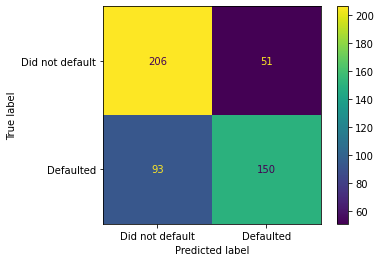

In [95]:
plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test,
                      values_format='d',
                      display_labels=["Did not default", "Defaulted"])
# In the confusion matrix, we see that of the 257 people that did not default, 202 (79%) were correctly classified.
# And of the 243 people that defaulted, 143 (59%) were correctly classified. So SVM isn't too good. 

In [96]:
#auc = metrics.roc_auc_score(y_test, X_test_scaled)
# tak liczone było wcześniej: roc_auc_score(val_df[target].values, preds)
#roc_auc_score(y_test, X_test_scaled)

Optymalizacja modelu - Cross Validation + optymalizacja parametrów

In [97]:
# Optymalizacja maszyny wektorów nośnych polega na znalezieniu najlepszej wartości dla gammy oraz, potencjalnie, dla parametru 
# regularności, C. Zobaczmy więc, czy możemy znaleźć lepsze wartości parametrów przy użyciu walidacji krzyżowej w nadziei, że 
# uda nam się poprawić dokładność na zbiorze testowym.
# Ponieważ mamy do zoptymalizowania dwa parametry, użyjemy funkcji GridSearchCV(). Podajemy kilka potencjalnych wartości dla 
# gamma i C, a funkcja GridSearchCV() testuje dla nas wszystkie możliwe kombinacje parametrów.
param_grid = [
  {'C': [0.5, 1, 10, 100], # Values for C must be > 0
   'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf']},
]
# We are includeing alco C=1 and gamma='scale'as possible choices, since they are the default values.
optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        scoring='accuracy',
        #scoring='roc_auc',
    ## (accruacy is default scoring), can be also for instance 'roc_auc'
        verbose=0 
    )

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}


Wniosek: Idealną wartością dla C jest 0.5 , co oznacza, że zastosujemy regularyzację, a idealną wartością dla gamma jest scale.

In [98]:
param_grid = [
  {'C': [0.5, 1, 10, 100],
   'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf']},
]
optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        scoring='roc_auc',
        verbose=0 
    )

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


Wniosek: Idealną wartością dla C jest 1, co oznacza, że zastosujemy regularyzację, a idealną wartością dla gamma jest 0,001.

In [99]:
clf_svm1 = SVC(random_state=42, C=100, gamma='scale')
clf_svm1.fit(X_train_scaled, y_train)

SVC(C=100, random_state=42)

In [100]:
clf_svm2 = SVC(random_state=42, C=100, gamma=0.001)
clf_svm2.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.001, random_state=42)

Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


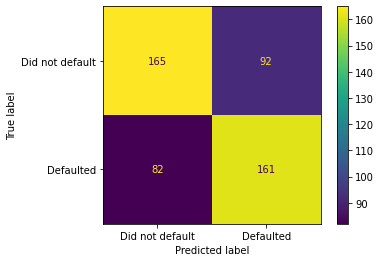

In [101]:
plot_confusion_matrix(clf_svm1, 
                      X_test_scaled, 
                      y_test,
                      values_format='d',
                      display_labels=["Did not default", "Defaulted"])

Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


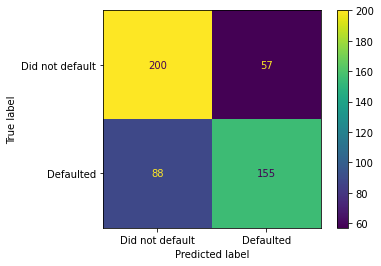

In [102]:
plot_confusion_matrix(clf_svm2, 
                      X_test_scaled, 
                      y_test,
                      values_format='d',
                      display_labels=["Did not default", "Defaulted"])

Wyniki zoptymalizowanej maszyny wektorów nośnych są nieco lepsze niż poprzednio. Dwie osoby więcej zostały poprawnie zaklasyfikowane jako defetyzujące. A więc optymalizacja tylko nieznacznie pomogła.
Ostatnią rzeczą, którą zrobimy, będzie narysowanie granicy decyzji maszyny wektorów nośnych i omówienie sposobu jej interpretacji.
Pierwszą rzeczą, którą musimy zrobić, jest policzenie liczby kolumn w X:

In [103]:
len(df_downsample.columns) # 24

24

Widzimy więc, że w X są 24 cechy, czyli kolumny. Jest to problem, ponieważ aby przedstawić dane w surowej postaci, należałoby stworzyć 24-wymiarowy wykres, po jednym wymiarze na każdą cechę używaną do prognozowania. Gdybyśmy chcieli, moglibyśmy po prostu wybrać losowo dwie cechy, które posłużą za osie x i y na naszym wykresie, ale zamiast tego użyjemy PCA (Principal Component Analysis), aby połączyć 24 cechy w dwie ortogonalne metacechy, które możemy wykorzystać jako osie wykresu. 
Zanim jednak zmniejszymy wykres, ustalmy najpierw, jak dokładny będzie taki wykres. Jeśli jest on stosunkowo dokładny, to rysowanie wykresu dwuwymiarowego ma sens. Jeśli nie, to wykres pomniejszony nie będzie zbyt użyteczny. Dokładność wykresu można określić, rysując coś, co nazywamy wykresem piargowym.

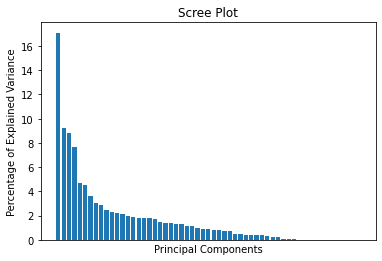

In [104]:
pca = PCA() # By default, PCA() centers the data, but does not scale it.
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

Z wykresu wynika, że pierwsza składowa główna, PC1, odpowiada za stosunkowo dużą część zmienności danych surowych, co oznacza, że będzie dobrym kandydatem na oś x na wykresie dwuwymiarowym. Jednak PC2 nie różni się zbytnio od PC3 lub PC4, co nie wróży dobrze redukcji wymiarów. 
Teraz narysujemy wykres PCA. Optymalizujemy dopasowanie SVM do PC1 i PC2.

In [105]:
train_pc1_coords = X_train_pca[:, 0] # pc1 contains the x-axis coordinates of the data after PCA
train_pc2_coords = X_train_pca[:, 1] # pc2 contains the y-axis coordinates of the data after PCA
 
pca_train_scaled = preprocessing.scale(np.column_stack((train_pc1_coords, train_pc2_coords))) # center and scale

# Now we optimize the SVM fit to the x and y-axis coordinates of the data after PCA dimension reduction...
param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf']},
]

optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        scoring='accuracy',
        verbose=0
    )

optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


Skoro mamy już optymalne wartości współczynników C i gamma, narysujmy wykres

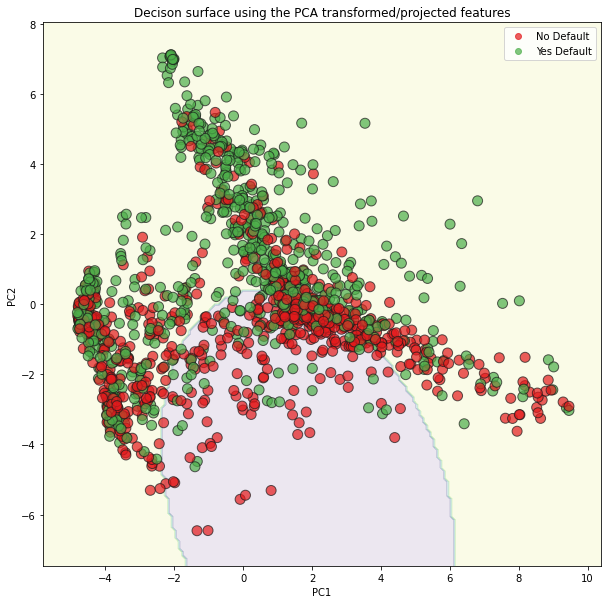

In [106]:
clf_svm = SVC(random_state=42, C=1000, gamma=0.001)
clf_svm.fit(pca_train_scaled, y_train)

# Transform the test dataset with the PCA
X_test_pca = pca.transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)
test_pc1_coords = X_test_pca[:, 0] 
test_pc2_coords = X_test_pca[:, 1]

# Now create a matrix of points that we can use to show the decision regions.
# The matrix will be a little bit larger than the transformed PCA points so that we can plot all of
# the PCA points on it without them being on the edge
x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

# now we will classify every point in that matrix with the SVM. Points on one side of the classification boundary will get 0, 
# and points on the other side will get 1.
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
# Right now, Z is just a long array of lots of 0s and 1s, which reflect how each point in the mesh was classified.
# We use reshape() so that each classification (0 or 1) corresponds to a specific point in the matrix.
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
# now we will use contourf() to draw a filled contour plot using the matrix values and classifications. 
# The contours will be filled according to the predicted classifications (0s and 1s) in Z
ax.contourf(xx, yy, Z, alpha=0.1)

# now create custom colors for the actual data points
cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])
# now draw the actual data points - these will be colored by their known (not predcited) classifications
# Setting alpha=0.7 lets us see if we are covering up a point scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_test, 
scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_train, 
               cmap=cmap, 
               s=100, 
               edgecolors='k', ## 'k' = black
               alpha=0.7)

# now create a legend
legend = ax.legend(scatter.legend_elements()[0], 
                   scatter.legend_elements()[1],
                    loc="upper right")
legend.get_texts()[0].set_text("No Default")
legend.get_texts()[1].set_text("Yes Default")

# now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decison surface using the PCA transformed/projected features')
# plt.savefig('svm_default.png')
plt.show()

Różowa część wykresu ('zewnętrze') to obszar, w którym przewiduje się, że wszystkie punkty danych nie zalegają z płatnościami. Żółta część wykresu ('wnętrze') to obszar, w którym przewiduje się, że wszystkie punkty danych nie zalegają z płatnościami. Kropki są punktami danych w zbiorze danych treningowych i są oznaczone kolorami zgodnie z ich znanymi klasyfikacjami: czerwony jest dla tych, które nie zalegają z płatnościami, a zielony dla tych, które zalegają z płatnościami.
Ponadto wyniki przedstawiają dane treningowe, a nie testowe, dlatego nie odpowiadają wygenerowanym przez nas macierzom konfuzji. Należy też pamiętać, że na tym rysunku dopasowaliśmy SVM tylko do dwóch pierwszych składowych głównych, a nie do wszystkich danych, a zatem jest to tylko przybliżenie prawdziwego klasyfikatora. Wreszcie, ponieważ wykres pokazał, że PC2 nie różni się zbytnio od PC3 i PC4, nie jest to zbyt dobre przybliżenie.

##### Regresja logistyczna - model 1

In [107]:
dflog=dataframe.copy()
dflog = pd.get_dummies(dflog, columns=["SEX"])
dflog = pd.get_dummies(dflog, columns=["EDUCATION"])
dflog = pd.get_dummies(dflog, columns=["MARRIAGE"])
dflog

LIMIT_BAL   AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
0        20000.0  24.0    2.0    2.0   -1.0   -1.0   -2.0   -2.0     3913.0   
1       120000.0  26.0   -1.0    2.0    0.0    0.0    0.0    2.0     2682.0   
2        90000.0  34.0    0.0    0.0    0.0    0.0    0.0    0.0    29239.0   
3        50000.0  37.0    0.0    0.0    0.0    0.0    0.0    0.0    46990.0   
4        50000.0  57.0   -1.0    0.0   -1.0    0.0    0.0    0.0     8617.0   
...          ...   ...    ...    ...    ...    ...    ...    ...        ...   
29995   220000.0  39.0    0.0    0.0    0.0    0.0    0.0    0.0   188948.0   
29996   150000.0  43.0   -1.0   -1.0   -1.0   -1.0    0.0    0.0     1683.0   
29997    30000.0  37.0    3.0    3.0    2.0   -1.0    0.0    0.0     3565.0   
29998    80000.0  41.0    1.0   -1.0    0.0    0.0    0.0   -1.0      -81.0   
29999    50000.0  46.0    0.0    0.0    0.0    0.0    0.0    0.0    47929.0   

       BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0         3102.0      689.0        0.0        0.0        0.0      0.00   
1         1725.0     2682.0     3272.0     3455.0     3261.0      0.00   
2        14027.0    13559.0    14331.0    14948.0    15549.0   1518.00   
3        48233.0    49291.0    28314.0    28959.0    29547.0   2000.00   
4         5670.0    35835.0    20940.0    19146.0    19131.0   2000.00   
...          ...        ...        ...        ...        ...       ...   
29995   192815.0   208365.0    88004.0    31237.0    15980.0   8500.00   
29996     1828.0     3502.0     8979.0     5190.0        0.0   1837.00   
29997     3356.0     2758.0    20878.0    20582.0    19357.0      0.00   
29998    78379.0    76304.0    52774.0    11855.0    48944.0  66522.18   
29999    48905.0    49764.0    36535.0    32428.0    15313.0   2078.00   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  SEX_1  \
0         689.0       0.0       0.0       0.0       0.0        1      0   
1        1000.0    1000.0    1000.0       0.0    2000.0        1      0   
2        1500.0    1000.0    1000.0    1000.0    5000.0        0      0   
3        2019.0    1200.0    1100.0    1069.0    1000.0        0      0   
4       36681.0   10000.0    9000.0     689.0     679.0        0      1   
...         ...       ...       ...       ...       ...      ...    ...   
29995   20000.0    5003.0    3047.0    5000.0    1000.0        0      1   
29996    3526.0    8998.0     129.0       0.0       0.0        0      1   
29997       0.0   22000.0    4200.0    2000.0    3100.0        1      1   
29998    3409.0    1178.0    1926.0   52964.0    1804.0        1      1   
29999    1800.0    1430.0    1000.0    1000.0    1000.0        1      1   

       SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  MARRIAGE_1  \
0          1            0            1            0            0           1   
1          1            0            1            0            0           0   
2          1            0            1            0            0           0   
3          1            0            1            0            0           1   
4          0            0            1            0            0           1   
...      ...          ...          ...          ...          ...         ...   
29995      0            0            0            1            0           1   
29996      0            0            0            1            0           0   
29997      0            0            1            0            0           0   
29998      0            0            0            1            0           1   
29999      0            0            1            0            0           1   

       MARRIAGE_2  MARRIAGE_3  
0               0           0  
1               1           0  
2               1           0  
3               0           0  
4               0           0  
...           ...         ...  
29995           0           0  
29996           1           0  
29997           1  

In [108]:
dflog['DEFAULT'].value_counts() # dla sprawdzenia, czy podstawowe f-cje dobrze sie wywoluja dla dflog

0    23364
1     6636
Name: DEFAULT, dtype: int64

Splitting the data into train and test

In [109]:
target = dflog['DEFAULT']
features = dflog.drop('DEFAULT', axis=1)
data_final = pd.concat([features, target], axis=1)

In [110]:
#Splitting the data for sklearn methods
train_y, test_y, train_X, test_X = train_test_split(target,features, test_size=0.3, random_state=123)

In [111]:
accuracy={}
model = LogisticRegression()
model.fit(train_X, train_y)

train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

print(classification_report(train_pred, train_y))
print('\nAccuracy Score for model1(training): ', accuracy_score(train_pred, train_y))

print(classification_report(test_pred, test_y))
print('\nAccuracy Score for model1(testing): ', accuracy_score(test_pred, test_y))

              precision    recall  f1-score   support

           0       1.00      0.78      0.87     20986
           1       0.00      0.43      0.00        14

    accuracy                           0.78     21000
   macro avg       0.50      0.60      0.44     21000
weighted avg       1.00      0.78      0.87     21000


Accuracy Score for model1(training):  0.7766666666666666
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      8995
           1       0.00      0.80      0.00         5

    accuracy                           0.78      9000
   macro avg       0.50      0.79      0.44      9000
weighted avg       1.00      0.78      0.88      9000


Accuracy Score for model1(testing):  0.7838888888888889


Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### KNN - model 1

In [112]:
#Standardization of data
sc = StandardScaler()
std_data = sc.fit_transform(train_X)
std_data_train = pd.DataFrame(std_data, columns=train_X.columns, index = train_X.index )
std_data_test = pd.DataFrame(sc.transform(test_X), columns=test_X.columns, index = test_X.index )
#Using GridsearchCV with standrardized data
param_grid = {'n_neighbors':[3,4,5,6,7,8,9,10,11,12],
              'weights': ['uniform', 'distance']}
model = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted')
model = model.fit(std_data_train, train_y)

In [113]:
model.best_score_

0.7801456177979154

In [114]:
model.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [115]:
train_pred2 = model.predict(std_data_train)
test_pred2 = model.predict(std_data_test)

In [116]:
print(metrics.classification_report(train_y, train_pred2))
print('\nAccuracy Score for model2(training): ', accuracy_score(train_pred2, train_y))

print(metrics.classification_report(test_y, test_pred2))
print('\nAccuracy Score for model2(testing): ', accuracy_score(test_pred2, test_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16312
           1       1.00      1.00      1.00      4688

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000


Accuracy Score for model2(training):  0.9992857142857143
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7052
           1       0.59      0.33      0.42      1948

    accuracy                           0.80      9000
   macro avg       0.71      0.63      0.65      9000
weighted avg       0.78      0.80      0.78      9000


Accuracy Score for model2(testing):  0.8042222222222222


##### Drzewa decyzyjne

In [117]:
param_grid = {'max_depth': np.arange(3, 5),
             'max_features': np.arange(3,5)}

In [118]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( train_X, train_y )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4]),
                         'max_features': array([3, 4])})

In [119]:
tree.best_score_

0.8072857142857142

In [120]:
tree.best_params_

{'max_depth': 3, 'max_features': 3}

In [121]:
clf_tree = DecisionTreeClassifier( max_depth = 3, max_features=4, criterion='gini' )
train_X = train_X[train_X.columns.difference(['pred_prob'])]
test_X = test_X[test_X.columns.difference(['pred_prob'])]
clf_tree.fit( train_X, train_y)

DecisionTreeClassifier(max_depth=3, max_features=4)

In [122]:
train_pred1 = clf_tree.predict(train_X)
test_pred1 = clf_tree.predict(test_X)

In [123]:
print(metrics.classification_report(train_y, train_pred1))
print('\nAccuracy Score for model3(training): ', accuracy_score(train_pred1, train_y))

print(metrics.classification_report(test_y, test_pred1))
print('\nAccuracy Score for model3(testing): ', accuracy_score(test_pred1, test_y))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87     16312
           1       0.52      0.19      0.28      4688

    accuracy                           0.78     21000
   macro avg       0.66      0.57      0.58     21000
weighted avg       0.74      0.78      0.74     21000


Accuracy Score for model3(training):  0.7804285714285715
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      7052
           1       0.51      0.20      0.28      1948

    accuracy                           0.78      9000
   macro avg       0.66      0.57      0.58      9000
weighted avg       0.74      0.78      0.75      9000


Accuracy Score for model3(testing):  0.7847777777777778


##### Naive Bayes

In [124]:
nb_clf = GaussianNB()
nb_clf.fit(train_X, train_y)

GaussianNB()

In [125]:
train_pred4=nb_clf.predict(train_X)
test_pred4=nb_clf.predict(test_X)

In [126]:
print(metrics.classification_report(train_y, train_pred4))
print('\nAccuracy Score for model4(training): ', accuracy_score(train_pred4, train_y))

print(metrics.classification_report(test_y, test_pred4))
print('\nAccuracy Score for model4(testing): ', accuracy_score(train_pred4, train_y))

              precision    recall  f1-score   support

           0       0.86      0.35      0.49     16312
           1       0.26      0.80      0.39      4688

    accuracy                           0.45     21000
   macro avg       0.56      0.58      0.44     21000
weighted avg       0.73      0.45      0.47     21000


Accuracy Score for model4(training):  0.4481904761904762
              precision    recall  f1-score   support

           0       0.87      0.35      0.50      7052
           1       0.26      0.81      0.39      1948

    accuracy                           0.45      9000
   macro avg       0.56      0.58      0.44      9000
weighted avg       0.74      0.45      0.47      9000


Accuracy Score for model4(testing):  0.4481904761904762


##### Lasy losowe - model 3

In [127]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_depth = 10, max_features=4, n_jobs=-1)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(max_depth=10, max_features=4, n_jobs=-1, oob_score=True)

In [128]:
train_pred5=radm_clf.predict(train_X)
test_pred5=radm_clf.predict(test_X)

In [129]:
print(metrics.classification_report(train_y, train_pred5))
print('\nAccuracy Score for model5(training): ', accuracy_score(train_pred5, train_y))

print(metrics.classification_report(test_y, test_pred5))
print('\nAccuracy Score for model5(testing): ', accuracy_score(test_pred5, test_y))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91     16312
           1       0.84      0.45      0.59      4688

    accuracy                           0.86     21000
   macro avg       0.85      0.71      0.75     21000
weighted avg       0.86      0.86      0.84     21000


Accuracy Score for model5(training):  0.8586666666666667
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7052
           1       0.65      0.37      0.47      1948

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000


Accuracy Score for model5(testing):  0.8206666666666667


##### Podsumowanie 4 ostatnich modeli względem metryki Accuracy

In [130]:
lr=accuracy_score(test_pred, test_y)*100
knn=accuracy_score(test_pred2, test_y)*100
dt=accuracy_score(test_pred1, test_y)*100
rf=accuracy_score(test_pred5, test_y)*100
nb=accuracy_score(test_pred4, test_y)*100

lr1=accuracy_score(train_pred, train_y)*100
knn1=accuracy_score(train_pred2, train_y)*100
dt1=accuracy_score(train_pred1, train_y)*100
rf1=accuracy_score(train_pred5, train_y)*100
nb1=accuracy_score(train_pred4, train_y)*100

In [131]:
dict_train={"Logistic Regression":lr1, "KNN":knn1, "Decision Tree":dt1, "Random Forest":rf1, "Naive Bayes":nb1}
dict_test={"Logistic Regression":lr, "KNN":knn, "Decision Tree":dt, "Random Forest":rf, "Naive Bayes":nb}

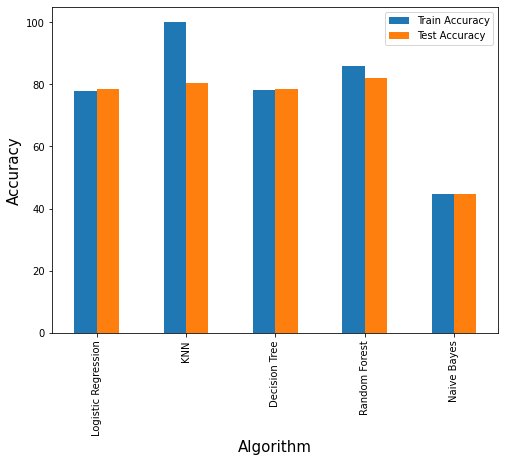

In [132]:
plot1=pd.DataFrame([dict_train,dict_test], index=['Train Accuracy','Test Accuracy']).transpose()

plot1.plot(kind='bar',figsize=(8,6))
plt.xlabel("Algorithm",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.show()

##### Drzewa decyzyjne - model 2 

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)
dt.tree_.node_count, dt.tree_.max_depth

(583, 29)

In [134]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [135]:
# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

train      test
accuracy     1.0  0.610000
precision    1.0  0.596000
recall       1.0  0.613169
f1           1.0  0.604462

Jak widać powyżej, model uzyskał dokładność 72% przy niskich wynikach dla precision i recall.
Do optymalizacji wyników przeprowadza się grid search z cross validation.

In [136]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='precision',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(3, 1)

In [137]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

In [138]:
train_test_gr_error

train      test
accuracy   0.616000  0.640000
precision  0.902222  0.888889
recall     0.268164  0.296296
f1         0.413442  0.444444

Widać wzrost accuracy, a przede wsystkim precision.

### Eksploracja danych 

In [139]:
TOPcopyTOP=dataframe.copy() # dataset without variable ID
print(TOPcopyTOP.shape)
TOPcopyTOP.head()

(30000, 24)


LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1  24.0    2.0    2.0   -1.0   -1.0   
1   120000.0    2          2         2  26.0   -1.0    2.0    0.0    0.0   
2    90000.0    2          2         2  34.0    0.0    0.0    0.0    0.0   
3    50000.0    2          2         1  37.0    0.0    0.0    0.0    0.0   
4    50000.0    1          2         1  57.0   -1.0    0.0   -1.0    0.0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0   -2.0   -2.0     3913.0     3102.0      689.0        0.0        0.0   
1    0.0    2.0     2682.0     1725.0     2682.0     3272.0     3455.0   
2    0.0    0.0    29239.0    14027.0    13559.0    14331.0    14948.0   
3    0.0    0.0    46990.0    48233.0    49291.0    28314.0    28959.0   
4    0.0    0.0     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4    19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0   

   DEFAULT  
0        1  
1        1  
2        0  
3        0  
4        0

In [140]:
data_good1 = TOPcopyTOP[(TOPcopyTOP['AGE'] < 18)] # check if the borrowers are of legal age
print(data_good1.shape) # Yes, it's true

(0, 24)


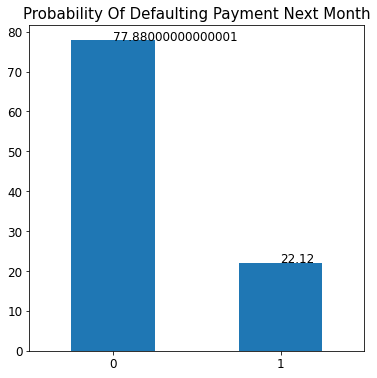

In [141]:
def_cntTOP = (TOPcopyTOP.DEFAULT.value_counts(normalize=True)*100)
def_cntTOP.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cntTOP):
    plt.text(x,y,y,fontsize=12)
plt.show()

Data are unbalanced, so making a sampling on TRAINING data

Attention: Undersampling reduces the number of observations from the majority class to make the data set more balanced. This method is usually applied to large sets of data sets. Oversampling, on the other hand, aims to replicate observations from the minority class.

##### Downsampling

In [142]:
df_without_default = TOPcopyTOP[TOPcopyTOP['DEFAULT'] == 0]
df_with_default = TOPcopyTOP[TOPcopyTOP['DEFAULT'] == 1]

# Downsampling for df_no_default:
df_without_default_downsampled = resample(df_without_default,
                                  replace=False,
                                  n_samples=1000,
                                  random_state=42)
len(df_without_default_downsampled)

# Downsampling for df_default:
df_with_default_downsampled = resample(df_with_default,
                                  replace=False,
                                  n_samples=1000,
                                  random_state=42)
len(df_with_default_downsampled)

# merge the two downsampled datasets into a single dataframe
df_downsampling = pd.concat([df_no_default_downsampled, df_default_downsampled])
len(df_downsampling)

2000

##### Outliers

Metoda 1 - funkcja clip()

In [143]:
def outlier_capping(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return x
dataframe=dataframe.apply(outlier_capping)
# clip() is used to limit values in an array. Given an interval, values outside the interval are clipped to the interval edges. 
# For example, if an interval of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1.
dataframe # We can see, that dimension is the same, so here don't exist outliers

LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0        20000.0    2          2         1  24.0    2.0    2.0   -1.0   -1.0   
1       120000.0    2          2         2  26.0   -1.0    2.0    0.0    0.0   
2        90000.0    2          2         2  34.0    0.0    0.0    0.0    0.0   
3        50000.0    2          2         1  37.0    0.0    0.0    0.0    0.0   
4        50000.0    1          2         1  57.0   -1.0    0.0   -1.0    0.0   
...          ...  ...        ...       ...   ...    ...    ...    ...    ...   
29995   220000.0    1          3         1  39.0    0.0    0.0    0.0    0.0   
29996   150000.0    1          3         2  43.0   -1.0   -1.0   -1.0   -1.0   
29997    30000.0    1          2         2  37.0    3.0    3.0    2.0   -1.0   
29998    80000.0    1          3         1  41.0    1.0   -1.0    0.0    0.0   
29999    50000.0    1          2         1  46.0    0.0    0.0    0.0    0.0   

       PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0       -2.0   -2.0     3913.0     3102.0      689.0        0.0        0.0   
1        0.0    2.0     2682.0     1725.0     2682.0     3272.0     3455.0   
2        0.0    0.0    29239.0    14027.0    13559.0    14331.0    14948.0   
3        0.0    0.0    46990.0    48233.0    49291.0    28314.0    28959.0   
4        0.0    0.0     8617.0     5670.0    35835.0    20940.0    19146.0   
...      ...    ...        ...        ...        ...        ...        ...   
29995    0.0    0.0   188948.0   192815.0   208365.0    88004.0    31237.0   
29996    0.0    0.0     1683.0     1828.0     3502.0     8979.0     5190.0   
29997    0.0    0.0     3565.0     3356.0     2758.0    20878.0    20582.0   
29998    0.0   -1.0      -81.0    78379.0    76304.0    52774.0    11855.0   
29999    0.0    0.0    47929.0    48905.0    49764.0    36535.0    32428.0   

       BILL_AMT6    PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0            0.0      0.0000     689.0       0.0       0.0       0.0   
1         3261.0      0.0000    1000.0    1000.0    1000.0       0.0   
2        15549.0   1518.0000    1500.0    1000.0    1000.0    1000.0   
3        29547.0   2000.0000    2019.0    1200.0    1100.0    1069.0   
4        19131.0   2000.0000   36681.0   10000.0    9000.0     689.0   
...          ...         ...       ...       ...       ...       ...   
29995    15980.0   8500.0000   20000.0    5003.0    3047.0    5000.0   
29996        0.0   1837.0000    3526.0    8998.0     129.0       0.0   
29997    19357.0      0.0000       0.0   22000.0    4200.0    2000.0   
29998    48944.0  66513.0918    3409.0    1178.0    1926.0   52964.0   
29999    15313.0   2078.0000    1800.0    1430.0    1000.0    1000.0   

       PAY_AMT6  DEFAULT  
0           0.0        1  
1        2000.0        1  
2        5000.0        0  
3        1000.0        0  
4         679.0        0  
...         ...      ...  
29995    1000.0        0  
29996       0.0        0  
29997    3100.0        1  
29998    1804.0        1  
29999    1000.0        1  

[30000 rows x 24 columns]

Metoda 2 - IQR for all variable

Upper bound for LIMIT_BAL: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: LIMIT_BAL, Length: 30000, dtype: bool
Lower bound for LIMIT_BAL: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: LIMIT_BAL, Length: 30000, dtype: bool


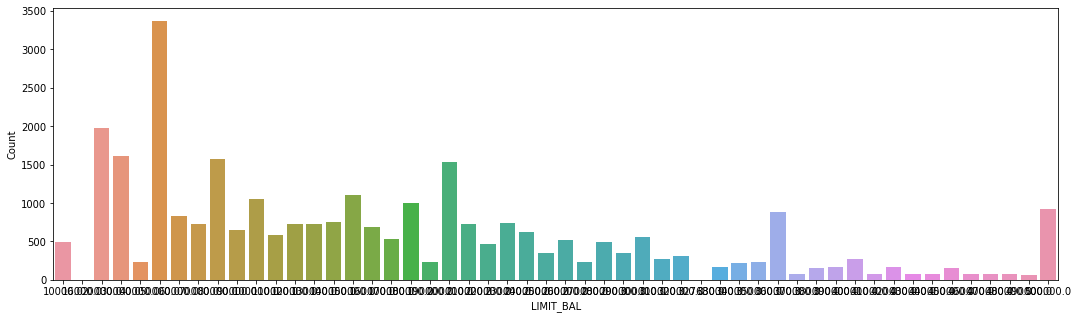

In [144]:
# LIMIT_BAL
Q3_LIMIT_BAL, Q1_LIMIT_BAL = np.percentile(TOPcopyTOP['LIMIT_BAL'], [75 ,25])
IQR_LIMIT_BAL = Q3_LIMIT_BAL - Q1_LIMIT_BAL
upper_LIMIT_BAL = TOPcopyTOP['LIMIT_BAL'] >= (Q3_LIMIT_BAL+1.5*IQR_LIMIT_BAL)
print("Upper bound for LIMIT_BAL:",upper_LIMIT_BAL)      # 0, so is good - aren't outliers
lower_LIMIT_BAL = TOPcopyTOP['LIMIT_BAL'] <= (Q1_LIMIT_BAL-1.5*IQR_LIMIT_BAL)
print("Lower bound for LIMIT_BAL:",lower_LIMIT_BAL)      # 0, so is good - aren't outliers
# Histogram of LIMIT_BAL (to vizualitation)
plt.figure(figsize=(18,5))
LIMIT_BAL_data=TOPcopyTOP['LIMIT_BAL'].value_counts().reset_index()
sns.barplot(x='index',y='LIMIT_BAL',data=LIMIT_BAL_data,orient='v')
plt.xlabel("LIMIT_BAL")
plt.ylabel("Count")
plt.show()

In [145]:
# SEX
Q3_SEX, Q1_SEX = np.percentile(TOPcopyTOP['SEX'], [75 ,25])
IQR_SEX = Q3_SEX - Q1_SEX
upper_SEX = TOPcopyTOP['SEX'] >= (Q3_SEX+1.5*IQR_SEX)
print("Upper bound for SEX:",upper_SEX)      # 0, so is good - aren't outliers
lower_SEX = TOPcopyTOP['SEX'] <= (Q1_SEX-1.5*IQR_SEX)
print("Lower bound for SEX:",lower_SEX)      # 0, so is good - aren't outliers

Upper bound for SEX: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: SEX, Length: 30000, dtype: bool
Lower bound for SEX: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: SEX, Length: 30000, dtype: bool


In [146]:
# AGE
Q3_AGE, Q1_AGE = np.percentile(TOPcopyTOP['AGE'], [75 ,25])
IQR_AGE = Q3_AGE - Q1_AGE
upper_AGE = TOPcopyTOP['AGE'] >= (Q3_AGE+1.5*IQR_AGE)
print("Upper bound for AGE:",upper_AGE)      # 0, so is good - aren't outliers
lower_AGE = TOPcopyTOP['AGE'] <= (Q1_AGE-1.5*IQR_AGE)
print("Lower bound for AGE:",lower_AGE)      # 0, so is good - aren't outliers

Upper bound for AGE: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: AGE, Length: 30000, dtype: bool
Lower bound for AGE: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: AGE, Length: 30000, dtype: bool


In [147]:
# PAY_0
Q3_PAY_0, Q1_PAY_0 = np.percentile(TOPcopyTOP['PAY_0'], [75 ,25])
IQR_PAY_0 = Q3_PAY_0 - Q1_PAY_0
upper_PAY_0 = TOPcopyTOP['PAY_0'] >= (Q3_PAY_0+1.5*IQR_PAY_0)
print("Upper bound for PAY_0:",upper_PAY_0)      # 0, so is good - aren't outliers
lower_PAY_0 = TOPcopyTOP['PAY_0'] <= (Q1_PAY_0-1.5*IQR_PAY_0)
print("Lower bound for PAY_0:",lower_PAY_0)      # 0, so is good - aren't outliers

Upper bound for PAY_0: 0         True
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997     True
29998    False
29999    False
Name: PAY_0, Length: 30000, dtype: bool
Lower bound for PAY_0: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: PAY_0, Length: 30000, dtype: bool


In [148]:
# PAY_2
Q3_PAY_2, Q1_PAY_2 = np.percentile(TOPcopyTOP['PAY_2'], [75 ,25])
IQR_PAY_2 = Q3_PAY_2 - Q1_PAY_2
upper_PAY_2 = TOPcopyTOP['PAY_2'] >= (Q3_PAY_2+1.5*IQR_PAY_2)
print("Upper bound for PAY_2:",upper_PAY_2)      # 0, so is good - aren't outliers
lower_PAY_2 = TOPcopyTOP['PAY_2'] <= (Q1_PAY_2-1.5*IQR_PAY_2)
print("Lower bound for PAY_2:",lower_PAY_2)      # 0, so is good - aren't outliers

Upper bound for PAY_2: 0         True
1         True
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997     True
29998    False
29999    False
Name: PAY_2, Length: 30000, dtype: bool
Lower bound for PAY_2: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: PAY_2, Length: 30000, dtype: bool


In [149]:
# PAY_3
Q3_PAY_3, Q1_PAY_3 = np.percentile(TOPcopyTOP['PAY_3'], [75 ,25])
IQR_PAY_3 = Q3_PAY_3 - Q1_PAY_3
upper_PAY_3 = TOPcopyTOP['PAY_3'] >= (Q3_PAY_3+1.5*IQR_PAY_3)
print("Upper bound for PAY_3:",upper_PAY_3)      # 0, so is good - aren't outliers
lower_PAY_3 = TOPcopyTOP['PAY_3'] <= (Q1_PAY_3-1.5*IQR_PAY_3)
print("Lower bound for PAY_3:",lower_PAY_3)      # 0, so is good - aren't outliers

Upper bound for PAY_3: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997     True
29998    False
29999    False
Name: PAY_3, Length: 30000, dtype: bool
Lower bound for PAY_3: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: PAY_3, Length: 30000, dtype: bool


In [150]:
# PAY_4
Q3_PAY_4, Q1_PAY_4 = np.percentile(TOPcopyTOP['PAY_4'], [75 ,25])
IQR_PAY_4 = Q3_PAY_4 - Q1_PAY_4
upper_PAY_4 = TOPcopyTOP['PAY_4'] >= (Q3_PAY_4+1.5*IQR_PAY_4)
print("Upper bound for PAY_4:",upper_PAY_4)      # 0, so is good - aren't outliers
lower_PAY_4 = TOPcopyTOP['PAY_4'] <= (Q1_PAY_4-1.5*IQR_PAY_4)
print("Lower bound for PAY_4:",lower_PAY_4)      # 0, so is good - aren't outliers

Upper bound for PAY_4: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: PAY_4, Length: 30000, dtype: bool
Lower bound for PAY_4: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: PAY_4, Length: 30000, dtype: bool


In [151]:
# PAY_5
Q3_PAY_5, Q1_PAY_5 = np.percentile(TOPcopyTOP['PAY_5'], [75 ,25])
IQR_PAY_5 = Q3_PAY_5 - Q1_PAY_5
upper_PAY_5 = TOPcopyTOP['PAY_5'] >= (Q3_PAY_5+1.5*IQR_PAY_5)
print("Upper bound for PAY_5:",upper_PAY_5)      # 0, so is good - aren't outliers
lower_PAY_5 = TOPcopyTOP['PAY_5'] <= (Q1_PAY_5-1.5*IQR_PAY_5)
print("Lower bound for PAY_5:",lower_PAY_5)      # 0, so is good - aren't outliers

Upper bound for PAY_5: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: PAY_5, Length: 30000, dtype: bool
Lower bound for PAY_5: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: PAY_5, Length: 30000, dtype: bool


In [152]:
# PAY_6
Q3_PAY_6, Q1_PAY_6 = np.percentile(TOPcopyTOP['PAY_6'], [75 ,25])
IQR_PAY_6 = Q3_PAY_6 - Q1_PAY_6
upper_PAY_6 = TOPcopyTOP['PAY_6'] >= (Q3_PAY_6+1.5*IQR_PAY_6)
print("Upper bound for PAY_6:",upper_PAY_6)      # 0, so is good - aren't outliers
lower_PAY_6 = TOPcopyTOP['PAY_6'] <= (Q1_PAY_6-1.5*IQR_PAY_6)
print("Lower bound for PAY_6:",lower_PAY_6)      # 0, so is good - aren't outliers

Upper bound for PAY_6: 0        False
1         True
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: PAY_6, Length: 30000, dtype: bool
Lower bound for PAY_6: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: PAY_6, Length: 30000, dtype: bool


In [153]:
# BILL_AMT1
Q3_BILL_AMT1, Q1_BILL_AMT1 = np.percentile(TOPcopyTOP['BILL_AMT1'], [75 ,25])
IQR_BILL_AMT1 = Q3_BILL_AMT1 - Q1_BILL_AMT1
upper_BILL_AMT1 = TOPcopyTOP['BILL_AMT1'] >= (Q3_BILL_AMT1+1.5*IQR_BILL_AMT1)
print("Upper bound for BILL_AMT1:",upper_BILL_AMT1)      # 0, so is good - aren't outliers
lower_BILL_AMT1 = TOPcopyTOP['BILL_AMT1'] <= (Q1_BILL_AMT1-1.5*IQR_BILL_AMT1)
print("Lower bound for BILL_AMT1:",lower_BILL_AMT1)      # 0, so is good - aren't outliers

Upper bound for BILL_AMT1: 0        False
1        False
2        False
3        False
4        False
         ...  
29995     True
29996    False
29997    False
29998    False
29999    False
Name: BILL_AMT1, Length: 30000, dtype: bool
Lower bound for BILL_AMT1: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: BILL_AMT1, Length: 30000, dtype: bool


In [154]:
# BILL_AMT2
Q3_BILL_AMT2, Q1_BILL_AMT2 = np.percentile(TOPcopyTOP['BILL_AMT2'], [75 ,25])
IQR_BILL_AMT2 = Q3_BILL_AMT2 - Q1_BILL_AMT2
upper_BILL_AMT2 = TOPcopyTOP['BILL_AMT2'] >= (Q3_BILL_AMT2+1.5*IQR_BILL_AMT2)
print("Upper bound for BILL_AMT2:",upper_BILL_AMT2)      # 0, so is good - aren't outliers
lower_BILL_AMT2 = TOPcopyTOP['BILL_AMT2'] <= (Q1_BILL_AMT2-1.5*IQR_BILL_AMT2)
print("Lower bound for BILL_AMT2:",lower_BILL_AMT2)      # 0, so is good - aren't outliers

Upper bound for BILL_AMT2: 0        False
1        False
2        False
3        False
4        False
         ...  
29995     True
29996    False
29997    False
29998    False
29999    False
Name: BILL_AMT2, Length: 30000, dtype: bool
Lower bound for BILL_AMT2: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: BILL_AMT2, Length: 30000, dtype: bool


In [155]:
# BILL_AMT3
Q3_BILL_AMT3, Q1_BILL_AMT3 = np.percentile(TOPcopyTOP['BILL_AMT3'], [75 ,25])
IQR_BILL_AMT3 = Q3_BILL_AMT3 - Q1_BILL_AMT3
upper_BILL_AMT3 = TOPcopyTOP['BILL_AMT3'] >= (Q3_BILL_AMT3+1.5*IQR_BILL_AMT3)
print("Upper bound for BILL_AMT3:",upper_BILL_AMT3)      # 0, so is good - aren't outliers
lower_BILL_AMT3 = TOPcopyTOP['BILL_AMT3'] <= (Q1_BILL_AMT3-1.5*IQR_BILL_AMT3)
print("Lower bound for BILL_AMT3:",lower_BILL_AMT3)      # 0, so is good - aren't outliers

Upper bound for BILL_AMT3: 0        False
1        False
2        False
3        False
4        False
         ...  
29995     True
29996    False
29997    False
29998    False
29999    False
Name: BILL_AMT3, Length: 30000, dtype: bool
Lower bound for BILL_AMT3: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: BILL_AMT3, Length: 30000, dtype: bool


In [156]:
# BILL_AMT4
Q3_BILL_AMT4, Q1_BILL_AMT4 = np.percentile(TOPcopyTOP['BILL_AMT4'], [75 ,25])
IQR_BILL_AMT4 = Q3_BILL_AMT4 - Q1_BILL_AMT4
upper_BILL_AMT4 = TOPcopyTOP['BILL_AMT4'] >= (Q3_BILL_AMT4+1.5*IQR_BILL_AMT4)
print("Upper bound for BILL_AMT4:",upper_BILL_AMT4)      # 0, so is good - aren't outliers
lower_BILL_AMT4 = TOPcopyTOP['BILL_AMT4'] <= (Q1_BILL_AMT4-1.5*IQR_BILL_AMT4)
print("Lower bound for BILL_AMT4:",lower_BILL_AMT4)      # 0, so is good - aren't outliers

Upper bound for BILL_AMT4: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: BILL_AMT4, Length: 30000, dtype: bool
Lower bound for BILL_AMT4: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: BILL_AMT4, Length: 30000, dtype: bool


In [157]:
# BILL_AMT5
Q3_BILL_AMT5, Q1_BILL_AMT5 = np.percentile(TOPcopyTOP['BILL_AMT5'], [75 ,25])
IQR_BILL_AMT5 = Q3_BILL_AMT5 - Q1_BILL_AMT5
upper_BILL_AMT5 = TOPcopyTOP['BILL_AMT5'] >= (Q3_BILL_AMT5+1.5*IQR_BILL_AMT5)
print("Upper bound for BILL_AMT5:",upper_BILL_AMT5)      # 0, so is good - aren't outliers
lower_BILL_AMT5 = TOPcopyTOP['BILL_AMT5'] <= (Q1_BILL_AMT5-1.5*IQR_BILL_AMT5)
print("Lower bound for BILL_AMT5:",lower_BILL_AMT5)      # 0, so is good - aren't outliers

Upper bound for BILL_AMT5: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: BILL_AMT5, Length: 30000, dtype: bool
Lower bound for BILL_AMT5: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: BILL_AMT5, Length: 30000, dtype: bool


In [158]:
# BILL_AMT6
Q3_BILL_AMT6, Q1_BILL_AMT6 = np.percentile(TOPcopyTOP['BILL_AMT6'], [75 ,25])
IQR_BILL_AMT6 = Q3_BILL_AMT6 - Q1_BILL_AMT6
upper_BILL_AMT6 = TOPcopyTOP['BILL_AMT6'] >= (Q3_BILL_AMT6+1.5*IQR_BILL_AMT6)
print("Upper bound for BILL_AMT6:",upper_BILL_AMT6)      # 0, so is good - aren't outliers
lower_BILL_AMT6 = TOPcopyTOP['BILL_AMT6'] <= (Q1_BILL_AMT6-1.5*IQR_BILL_AMT6)
print("Lower bound for BILL_AMT6:",lower_BILL_AMT6)      # 0, so is good - aren't outliers

Upper bound for BILL_AMT6: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: BILL_AMT6, Length: 30000, dtype: bool
Lower bound for BILL_AMT6: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: BILL_AMT6, Length: 30000, dtype: bool


In [159]:
# PAY_AMT1
Q3_PAY_AMT1, Q1_PAY_AMT1 = np.percentile(TOPcopyTOP['PAY_AMT1'], [75 ,25])
IQR_PAY_AMT1 = Q3_PAY_AMT1 - Q1_PAY_AMT1
upper_PAY_AMT1 = TOPcopyTOP['PAY_AMT1'] >= (Q3_PAY_AMT1+1.5*IQR_PAY_AMT1)
print("Upper bound for PAY_AMT1:",upper_PAY_AMT1)      # 0, so is good - aren't outliers
lower_PAY_AMT1 = TOPcopyTOP['PAY_AMT1'] <= (Q1_PAY_AMT1-1.5*IQR_PAY_AMT1)
print("Lower bound for PAY_AMT1:",lower_PAY_AMT1)      # 0, so is good - aren't outliers

Upper bound for PAY_AMT1: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998     True
29999    False
Name: PAY_AMT1, Length: 30000, dtype: bool
Lower bound for PAY_AMT1: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: PAY_AMT1, Length: 30000, dtype: bool


In [160]:
# PAY_AMT2
Q3_PAY_AMT2, Q1_PAY_AMT2 = np.percentile(TOPcopyTOP['PAY_AMT2'], [75 ,25])
IQR_PAY_AMT2 = Q3_PAY_AMT2 - Q1_PAY_AMT2
upper_PAY_AMT2 = TOPcopyTOP['PAY_AMT2'] >= (Q3_PAY_AMT2+1.5*IQR_PAY_AMT2)
print("Upper bound for PAY_AMT2:",upper_PAY_AMT2)      # 0, so is good - aren't outliers
lower_PAY_AMT2 = TOPcopyTOP['PAY_AMT2'] <= (Q1_PAY_AMT2-1.5*IQR_PAY_AMT2)
print("Lower bound for PAY_AMT2:",lower_PAY_AMT2)      # 0, so is good - aren't outliers

Upper bound for PAY_AMT2: 0        False
1        False
2        False
3        False
4         True
         ...  
29995     True
29996    False
29997    False
29998    False
29999    False
Name: PAY_AMT2, Length: 30000, dtype: bool
Lower bound for PAY_AMT2: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: PAY_AMT2, Length: 30000, dtype: bool


In [161]:
# PAY_AMT3
Q3_PAY_AMT3, Q1_PAY_AMT3 = np.percentile(TOPcopyTOP['PAY_AMT3'], [75 ,25])
IQR_PAY_AMT3 = Q3_PAY_AMT3 - Q1_PAY_AMT3
upper_PAY_AMT3 = TOPcopyTOP['PAY_AMT3'] >= (Q3_PAY_AMT3+1.5*IQR_PAY_AMT3)
print("Upper bound for PAY_AMT3:",upper_PAY_AMT3)      # 0, so is good - aren't outliers
lower_PAY_AMT3 = TOPcopyTOP['PAY_AMT3'] <= (Q1_PAY_AMT3-1.5*IQR_PAY_AMT3)
print("Lower bound for PAY_AMT3:",lower_PAY_AMT3)      # 0, so is good - aren't outliers

Upper bound for PAY_AMT3: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997     True
29998    False
29999    False
Name: PAY_AMT3, Length: 30000, dtype: bool
Lower bound for PAY_AMT3: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: PAY_AMT3, Length: 30000, dtype: bool


In [162]:
# PAY_AMT4
Q3_PAY_AMT4, Q1_PAY_AMT4 = np.percentile(TOPcopyTOP['PAY_AMT4'], [75 ,25])
IQR_PAY_AMT4 = Q3_PAY_AMT4 - Q1_PAY_AMT4
upper_PAY_AMT4 = TOPcopyTOP['PAY_AMT4'] >= (Q3_PAY_AMT4+1.5*IQR_PAY_AMT4)
print("Upper bound for PAY_AMT4:",upper_PAY_AMT4)      # 0, so is good - aren't outliers
lower_PAY_AMT4 = TOPcopyTOP['PAY_AMT4'] <= (Q1_PAY_AMT4-1.5*IQR_PAY_AMT4)
print("Lower bound for PAY_AMT4:",lower_PAY_AMT4)      # 0, so is good - aren't outliers

Upper bound for PAY_AMT4: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: PAY_AMT4, Length: 30000, dtype: bool
Lower bound for PAY_AMT4: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: PAY_AMT4, Length: 30000, dtype: bool


In [163]:
# PAY_AMT5
Q3_PAY_AMT5, Q1_PAY_AMT5 = np.percentile(TOPcopyTOP['PAY_AMT5'], [75 ,25])
IQR_PAY_AMT5 = Q3_PAY_AMT5 - Q1_PAY_AMT5
upper_PAY_AMT5 = TOPcopyTOP['PAY_AMT5'] >= (Q3_PAY_AMT5+1.5*IQR_PAY_AMT5)
print("Upper bound for PAY_AMT5:",upper_PAY_AMT5)      # 0, so is good - aren't outliers
lower_PAY_AMT5 = TOPcopyTOP['PAY_AMT5'] <= (Q1_PAY_AMT5-1.5*IQR_PAY_AMT5)
print("Lower bound for PAY_AMT5:",lower_PAY_AMT5)      # 0, so is good - aren't outliers

Upper bound for PAY_AMT5: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998     True
29999    False
Name: PAY_AMT5, Length: 30000, dtype: bool
Lower bound for PAY_AMT5: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: PAY_AMT5, Length: 30000, dtype: bool


In [164]:
# PAY_AMT6
Q3_PAY_AMT6, Q1_PAY_AMT6 = np.percentile(TOPcopyTOP['PAY_AMT6'], [75 ,25])
IQR_PAY_AMT6 = Q3_PAY_AMT6 - Q1_PAY_AMT6
upper_PAY_AMT6 = TOPcopyTOP['PAY_AMT6'] >= (Q3_PAY_AMT6+1.5*IQR_PAY_AMT6)
print("Upper bound for PAY_AMT6:",upper_PAY_AMT6)      # 0, so is good - aren't outliers
lower_PAY_AMT6 = TOPcopyTOP['PAY_AMT6'] <= (Q1_PAY_AMT6-1.5*IQR_PAY_AMT6)
print("Lower bound for PAY_AMT6:",lower_PAY_AMT6)      # 0, so is good - aren't outliers

Upper bound for PAY_AMT6: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: PAY_AMT6, Length: 30000, dtype: bool
Lower bound for PAY_AMT6: 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: PAY_AMT6, Length: 30000, dtype: bool


Wniosek: Zarówno za pomocą f-cji clip(), ajk i metody IQR wyszło, że nie ma outlierów.

#### Korelacja cech

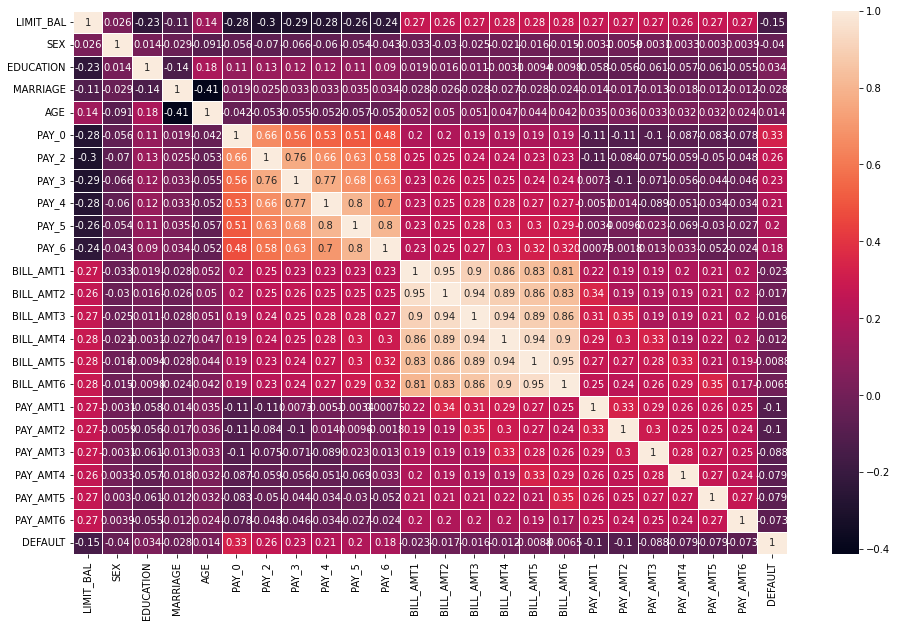

In [165]:
plt.figure (figsize= (16,10))
sns.heatmap(TOPcopyTOP.corr(),linewidths=.5,annot=True)
plt.show()

Widać, że najbardziej skorelowane są ze sobą cechy BILL_AMT_i, gdzie i=1,...,6

Uwaga: w modelu zostaną uwzględnione jeszcze 2 typy podmodeli: 1 - bez zmiennych o wysokiej korelacji oraz 2 - tylko 1 zmienna zostanie z tych wysokoskorelowanych

##### Podział na target i predyktory

Uwaga - równolegle będziemy analizować model z wykorzystaniem metody One-Hot Encoding oraz bez niej

Modele bez OHC

In [166]:
# Split the data into two parts: 
# The columns of data that we will use to make classifications and The column of data that we want to predict
X = df_downsampling.drop('DEFAULT', axis=1)
print(X.shape)
y = df_downsampling['DEFAULT']
print(y.shape)

(2000, 23)
(2000,)


In [167]:
X11 = X.drop('BILL_AMT1', axis=1)
X11 = X11.drop('BILL_AMT2', axis=1)
X11 = X11.drop('BILL_AMT3', axis=1)
X11 = X11.drop('BILL_AMT4', axis=1)
X11 = X11.drop('BILL_AMT5', axis=1)
X11 = X11.drop('BILL_AMT6', axis=1)
print(X11.shape)

(2000, 17)


In [168]:
X12 = X.drop('BILL_AMT6', axis=1)
X12 = X12.drop('BILL_AMT2', axis=1)
X12 = X12.drop('BILL_AMT3', axis=1)
X12 = X12.drop('BILL_AMT4', axis=1)
X12 = X12.drop('BILL_AMT5', axis=1)
print(X12.shape)

(2000, 18)


In [169]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=42)
scaler1 = preprocessing.StandardScaler().fit(X_train1) # standarization
X_train_scaled1 = scaler1.transform(X_train1)
X_test_scaled1 = scaler1.transform(X_test1)

In [170]:
X_train11, X_test11, y_train11, y_test11 = train_test_split(X11, y, random_state=42)
scaler11 = preprocessing.StandardScaler().fit(X_train11) # standarization
X_train_scaled11 = scaler11.transform(X_train11)
X_test_scaled11 = scaler11.transform(X_test11)

In [171]:
X_train12, X_test12, y_train12, y_test12 = train_test_split(X12, y, random_state=42)
scaler12 = preprocessing.StandardScaler().fit(X_train12) # standarization
X_train_scaled12 = scaler12.transform(X_train12)
X_test_scaled12 = scaler12.transform(X_test12)

PCA

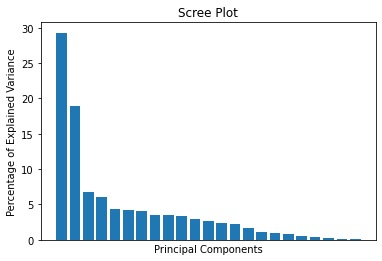

In [172]:
pca1 = PCA() 
X_train_pca1 = pca.fit_transform(X_train_scaled1)

per_var1 = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels1 = [str(x) for x in range(1, len(per_var1)+1)]
 
plt.bar(x=range(1,len(per_var1)+1), height=per_var1)
plt.tick_params(
    axis='x',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=False) 
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [173]:
# Sprawdźmy, jaki ile procent wariancji całego zbioru danych opisuje pierwsze n składowych
n_samples, n_features = X_train_scaled1.shape
n_digits = len(np.unique(X_train_scaled1))
labels = X_train_scaled1

# n = 4
pca = PCA(n_components=4)
data_r = pca.fit(X_train_scaled1).transform(X_train_scaled1)
print('wspóïczynnik wyjaĂnionych wariancji (4 pierwszych skïadowych): %s' %str
(pca.explained_variance_ratio_))
print('suma wyjaĂnionych wariancji (4 pierwszych skïadowych): %s' %str
(sum(pca.explained_variance_ratio_)))

wspóïczynnik wyjaĂnionych wariancji (4 pierwszych skïadowych): [0.29335011 0.18907605 0.06764292 0.05980435]
suma wyjaĂnionych wariancji (4 pierwszych skïadowych): 0.6098734418023042


Modele z OHC

In [174]:
X_encoded = pd.get_dummies(X, columns=['SEX',
                                       'EDUCATION',
                                       'MARRIAGE', 
                                       'PAY_0',
                                       'PAY_2',
                                       'PAY_3',
                                       'PAY_4',
                                       'PAY_5',
                                       'PAY_6'])
X_encoded.head() # get_dummies for all categorical columns 

LIMIT_BAL   AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
7510    380000.0  31.0     3859.0     9194.0    15157.0    11147.0    12483.0   
15325   240000.0  35.0     5391.0     7375.0     4908.0     5638.0     2582.0   
18666    50000.0  23.0     2332.0        0.0        0.0        0.0        0.0   
7494    330000.0  32.0   162657.0   151305.0   138277.0   141453.0   112633.0   
1239     80000.0  35.0     2890.0     9796.0    13443.0      396.0      396.0   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
7510     13680.0    9240.0   15233.0   11202.0   12493.0   13748.0   18061.0   
15325     4127.0    7375.0    4908.0    5638.0    2587.0    4127.0    4942.0   
18666        0.0       0.0       0.0       0.0       0.0       0.0       0.0   
7494    121242.0    5500.0    4723.0    5500.0    4000.0   10700.0    4500.0   
1239       396.0    9796.0   13443.0     396.0     396.0       0.0     396.0   

       SEX_1  SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
7510       0      1            0            0            1            0   
15325      0      1            0            1            0            0   
18666      0      1            1            0            0            0   
7494       1      0            1            0            0            0   
1239       0      1            0            1            0            0   

       MARRIAGE_1  MARRIAGE_2  MARRIAGE_3  PAY_0_-2.0  PAY_0_-1.0  PAY_0_0.0  \
7510            0           1           0           0           1          0   
15325           1           0           0           1           0          0   
18666           0           1           0           0           1          0   
7494            0           1           0           0           0          1   
1239            1           0           0           0           1          0   

       PAY_0_1.0  PAY_0_2.0  PAY_0_3.0  PAY_2_-2.0  PAY_2_-1.0  PAY_2_0.0  \
7510           0          0          0           0           1          0   
15325          0          0          0           1           0          0   
18666          0          0          0           0           1          0   
7494           0          0          0           0           0          1   
1239           0          0          0           0           1          0   

       PAY_2_1.0  PAY_2_2.0  PAY_2_3.0  PAY_3_-2.0  PAY_3_-1.0  PAY_3_0.0  \
7510           0          0          0           0           1          0   
15325          0          0          0           1           0          0   
18666          0          0          0           1           0          0   
7494           0          0          0           0           0          1   
1239           0          0          0           0           1          0   

       PAY_3_1.0  PAY_3_2.0  PAY_3_3.0  PAY_4_-2.0  PAY_4_-1.0  PAY_4_0.0  \
7510           0          0          0           0           1          0   
15325          0          0          0           1           0          0   
18666          0          0          0           1           0          0   
7494           0          0          0           0           0          1   
1239           0          0          0           0           1          0   

       PAY_4_1.0  PAY_4_2.0  PAY_4_3.0  PAY_5_-2.0  PAY_5_-1.0  PAY_5_0.0  \
7510           0          0          0           0           1          0   
15325          0          0          0           1           0          0   
18666          0          0          0           1           0          0   
7494           0          0          0           0           0          1   
1239           0          0          0           0           1          0   

       PAY_5_2.0  PAY_5_3.0  PAY_6_-2.0  PAY_6_-1.0  PAY_6_0.0  PAY_6_2.0  \
7510           0          0           0           1          0          0   
15325          0          0           1           0          0          0   
18666          0        

In [175]:
X21 = X.drop('BILL_AMT1', axis=1)
X21 = X21.drop('BILL_AMT2', axis=1)
X21 = X21.drop('BILL_AMT3', axis=1)
X21 = X21.drop('BILL_AMT4', axis=1)
X21 = X21.drop('BILL_AMT5', axis=1)
X21 = X21.drop('BILL_AMT6', axis=1)
print(X21.shape)

(2000, 17)


In [176]:
X22 = X.drop('BILL_AMT6', axis=1)
X22 = X22.drop('BILL_AMT2', axis=1)
X22 = X22.drop('BILL_AMT3', axis=1)
X22 = X22.drop('BILL_AMT4', axis=1)
X22 = X22.drop('BILL_AMT5', axis=1)
print(X22.shape)

(2000, 18)


In [177]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_encoded, y, random_state=42)
scaler2 = preprocessing.StandardScaler().fit(X_train2) # standarization
X_train_scaled2 = scaler2.transform(X_train2)
X_test_scaled2 = scaler2.transform(X_test2)

In [178]:
X_train21, X_test21, y_train21, y_test21 = train_test_split(X21, y, random_state=42)
scaler21 = preprocessing.StandardScaler().fit(X_train21) # standarization
X_train_scaled21 = scaler21.transform(X_train21)
X_test_scaled21 = scaler21.transform(X_test21)

In [179]:
X_train22, X_test22, y_train22, y_test22 = train_test_split(X22, y, random_state=42)
scaler22 = preprocessing.StandardScaler().fit(X_train22) # standarization
X_train_scaled22 = scaler22.transform(X_train22)
X_test_scaled22 = scaler22.transform(X_test22)

PCA

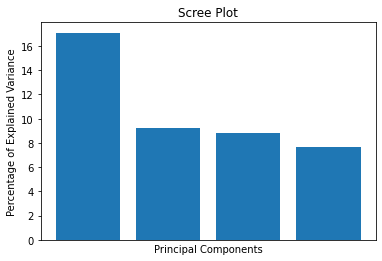

In [180]:
pca2 = PCA() 
X_train_pca2 = pca.fit_transform(X_train_scaled2)

per_var2 = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels2 = [str(x) for x in range(1, len(per_var2)+1)]
 
plt.bar(x=range(1,len(per_var2)+1), height=per_var2)
plt.tick_params(
    axis='x',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=False) 
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [181]:
# Sprawdźmy, jaki ile procent wariancji całego zbioru danych opisuje pierwsze n składowych
n_samples, n_features = X_train_scaled2.shape
n_digits = len(np.unique(X_train_scaled2))
labels = X_train_scaled2

In [182]:
# n = 4
pca = PCA(n_components=4)
data_r = pca.fit(X_train_scaled2).transform(X_train_scaled2)
print('wspóïczynnik wyjaĂnionych wariancji (4 pierwszych skïadowych): %s' %str
(pca.explained_variance_ratio_))
print('suma wyjaĂnionych wariancji (4 pierwszych skïadowych): %s' %str
(sum(pca.explained_variance_ratio_)))

wspóïczynnik wyjaĂnionych wariancji (4 pierwszych skïadowych): [0.17055804 0.09155438 0.0879273  0.07695337]
suma wyjaĂnionych wariancji (4 pierwszych skïadowych): 0.42699308989147744


### Modele predykcyjne 

##### SVM - model 4

In [183]:
optimal_params.fit(X_train_scaled1, y_train1)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


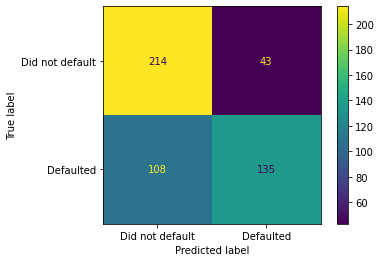

In [184]:
clf_svm1 = SVC(random_state=42, C=100, gamma=0.001)
clf_svm1.fit(X_train_scaled1, y_train1)
plot_confusion_matrix(clf_svm1, 
                      X_test_scaled1, 
                      y_test1,
                      values_format='d',
                      display_labels=["Did not default", "Defaulted"])

0: 83.27, 1: 55.56

##### SVM - model 5

In [185]:
optimal_params.fit(X_train_scaled11, y_train11)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


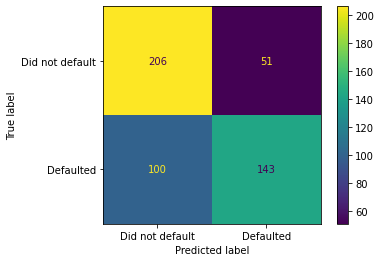

In [186]:
clf_svm11 = SVC(random_state=42, C=10, gamma=0.01)
clf_svm11.fit(X_train_scaled11, y_train11)
plot_confusion_matrix(clf_svm11, 
                      X_test_scaled11, 
                      y_test11,
                      values_format='d',
                      display_labels=["Did not default", "Defaulted"])

0:80.16, 1:58.85

##### SVM - model 6

In [187]:
optimal_params.fit(X_train_scaled12, y_train12)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


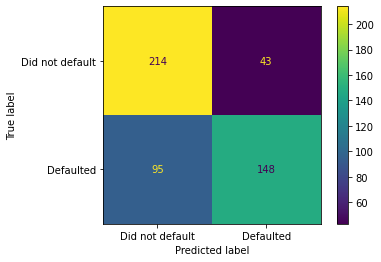

In [188]:
clf_svm11 = SVC(random_state=42, C=1, gamma='scale')
clf_svm11.fit(X_train_scaled11, y_train11)
plot_confusion_matrix(clf_svm11, 
                      X_test_scaled11, 
                      y_test11,
                      values_format='d',
                      display_labels=["Did not default", "Defaulted"])

0:83.27, 1:60.91

##### Xgboost - model 2

In [189]:
d1train = xgb.DMatrix(X_train1, y_train1.values)
d1valid = xgb.DMatrix(X_test1, y_test1.values)

watchlist = [(d1train, 'train'), (d1valid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [190]:
model = xgb.train(params, 
                d1train, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[16:44:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.71595	valid-auc:0.69824
[50]	train-auc:0.77927	valid-auc:0.76868
[100]	train-auc:0.79887	valid-auc:0.76900


Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[150]	train-auc:0.81552	valid-auc:0.77080
[200]	train-auc:0.82812	valid-auc:0.77030
[213]	train-auc:0.83121	valid-auc:0.76913


AUC = 0.77

##### Xgboost - model 3

In [191]:
d11train = xgb.DMatrix(X_train11, y_train11.values)
d11valid = xgb.DMatrix(X_test11, y_test11.values)

watchlist = [(d11train, 'train'), (d11valid, 'valid')]

model = xgb.train(params, 
                d11train, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[16:44:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.71711	valid-auc:0.69816
[50]	train-auc:0.77946	valid-auc:0.76939
[100]	train-auc:0.79457	valid-auc:0.77124
[150]	train-auc:0.80907	valid-auc:0.77006
[161]	train-auc:0.81179	valid-auc:0.76998


AUC = 0.77

##### Xgboost - model 4

In [192]:
d12train = xgb.DMatrix(X_train12, y_train12.values)
d12valid = xgb.DMatrix(X_test12, y_test12.values)

watchlist = [(d12train, 'train'), (d12valid, 'valid')]

model = xgb.train(params, 
                d12train, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[16:44:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.71711	valid-auc:0.69816
[50]	train-auc:0.78012	valid-auc:0.76632
[100]	train-auc:0.79607	valid-auc:0.76778
[123]	train-auc:0.80349	valid-auc:0.76916


AUC = 0.77

##### SVM - model 7

In [193]:
optimal_params.fit(X_train_scaled2, y_train2)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


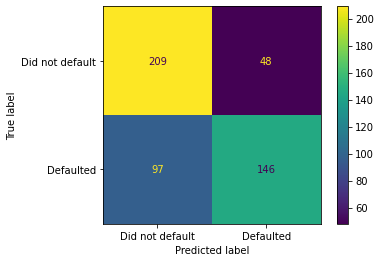

In [194]:
clf_svm2 = SVC(random_state=42, C=1, gamma=0.01)
clf_svm2.fit(X_train_scaled2, y_train2)
plot_confusion_matrix(clf_svm2, 
                      X_test_scaled2, 
                      y_test1,
                      values_format='d',
                      display_labels=["Did not default", "Defaulted"])

0: 81.32, 1: 60.08

##### SVM - model 8

In [195]:
optimal_params.fit(X_train_scaled21, y_train21)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


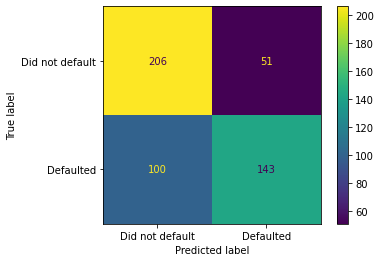

In [196]:
clf_svm11 = SVC(random_state=42, C=10, gamma=0.01)
clf_svm11.fit(X_train_scaled11, y_train11)
plot_confusion_matrix(clf_svm11, 
                      X_test_scaled11, 
                      y_test11,
                      values_format='d',
                      display_labels=["Did not default", "Defaulted"])

0: 80.16, 1: 58.85

##### SVM - model 9

In [197]:
optimal_params.fit(X_train_scaled22, y_train22)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


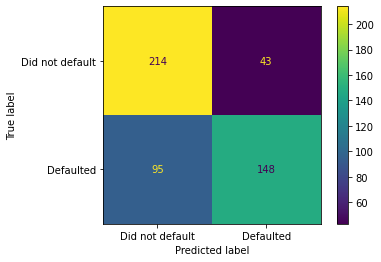

In [198]:
clf_svm11 = SVC(random_state=42, C=1, gamma='scale')
clf_svm11.fit(X_train_scaled11, y_train11)
plot_confusion_matrix(clf_svm11, 
                      X_test_scaled11, 
                      y_test11,
                      values_format='d',
                      display_labels=["Did not default", "Defaulted"])

In [200]:
# 0: 83.27, 1: 60.91

##### Xgboost - model 5

In [201]:
d2train = xgb.DMatrix(X_train2, y_train2.values)
d2valid = xgb.DMatrix(X_test2, y_test2.values)

watchlist = [(d2train, 'train'), (d2valid, 'valid')]

model = xgb.train(params, 
                d2train, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[17:08:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.69916	valid-auc:0.69329
[50]	train-auc:0.78369	valid-auc:0.76293
[100]	train-auc:0.80265	valid-auc:0.76677


Z:\Users\Patryk\anaconda3\envs\SVN\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[139]	train-auc:0.81410	valid-auc:0.76649


AUC = 0.77

##### Xgboost - model 6

In [202]:
d21train = xgb.DMatrix(X_train21, y_train21.values)
d21valid = xgb.DMatrix(X_test21, y_test21.values)

watchlist = [(d21train, 'train'), (d21valid, 'valid')]

model = xgb.train(params, 
                d21train, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[17:08:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.71711	valid-auc:0.69816
[50]	train-auc:0.77946	valid-auc:0.76939
[100]	train-auc:0.79457	valid-auc:0.77124
[150]	train-auc:0.80907	valid-auc:0.77006
[162]	train-auc:0.81214	valid-auc:0.77017


AUC = 0.77

##### Xgboost - model 7

In [203]:
d22train = xgb.DMatrix(X_train22, y_train22.values)
d22valid = xgb.DMatrix(X_test22, y_test22.values)

watchlist = [(d22train, 'train'), (d22valid, 'valid')]

model = xgb.train(params, 
                d22train, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[17:08:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.71711	valid-auc:0.69816
[50]	train-auc:0.78012	valid-auc:0.76632
[100]	train-auc:0.79607	valid-auc:0.76778
[123]	train-auc:0.80349	valid-auc:0.76916


In [204]:
AUC = 0.77

### Podsumowanie modeli na podstawie metryk na zbiorze testowym:
- 1. Lasy losowe 1:            AUC = 0.66
- 2. Lasy losowe 2(RF1 + OHE): AUC = 0.57
- 3. Xgboost 1:                AUC = 0.78
- 4. Lightgbm 1:               AUC = 0.78
- 5. Lightgbm 2(Lgbm1 + CV5):  AUC = 0.79
- 6. SVM 1(downsampling,OHE):                                                   0 - 80.16, 1 - 61.73
- 7. SVM 2(SVN1 + CV + optymalizacja parametrów względem 'scoring'='acc'):      0 - 77.82, 1 - 63.79
- 8. SVM 3(SVN1 + CV + optymalizacja parametrów względem 'scoring'='roc_auc'):  0 - 64.2, 1 - 66.26
- 9. regresja logistyczna 1:   AUC = 0.78, INNE = IN[255]
- 10. KNN 1(GridsearchCV):     AUC = 0.8,  INNE = IN[260]
- 11. Drzewa decyzyjne 1(GridsearchCV):     AUC = 0.79,  INNE = IN[267]
- 12. Naive Bayes 1(GridsearchCV):     AUC = 0.45,  INNE = IN[270]
- 13. Lasy losowe 3(GridsearchCV):     AUC = 0.82,  INNE = IN[273]
- 14. Drzewa decyzyjne 2:              AUC = 0.61,  INNE = OUT[135]
- 15. Drzewa decyzyjne 2(DT2 + GridsearchCV): AUC = 0.64,  INNE = OUT[138]
- 16. SVM 4(downsampling):                                                       0 - 83.27, 1 - 55.56
- 17. SVM 5(SVN4 - variables:BILL_AMT1-BILL_AMT6):                               0 - 80.16, 1 - 58.85
- 18. SVM 6(SVN4 - variables:BILL_AMT2-BILL_AMT6):                               0 - 83.27, 1 - 60.91
- 19. Xgboost 2(downsampling):                                                   AUC = 0.77
- 20. Xgboost 3(Xgboost2 - variables:BILL_AMT1-BILL_AMT6):                       AUC = 0.77
- 21. Xgboost 4(Xgboost2 - variables:BILL_AMT2-BILL_AMT6):                       AUC = 0.77
- 22. SVM 7(downsampling + OHE):                                                 0: 81.32, 1: 60.08
- 23. SVM 8(SVN7 - variables:BILL_AMT1-BILL_AMT6):                               0: 80.16, 1: 58.85
- 24. SVM 9(SVN7 - variables:BILL_AMT2-BILL_AMT6):                               0: 83.27, 1: 60.91
- 25. Xgboost 5(downsampling + OHE):                                             AUC = 0.77
- 26. Xgboost 6(Xgboost5 - variables:BILL_AMT1-BILL_AMT6):                       AUC = 0.77
- 27. Xgboost 7(Xgboost5 - variables:BILL_AMT2-BILL_AMT6):                       AUC = 0.77

- UWAGA: 0 - oznacza 'skuteczność dla 0 (didn't default), 1 - oznacza 'skuteczność dla 1 (defaulted).
- UWAGA: 1 to klasa większościowa, a 0 to klasa większościowa. 1 oznacza, że klient będzie zalegać z płatnościami w następnym miesiącu wydaje się. Wydaje się, że z tych powodów istotniejsze jest poprawne klasyfikowanie klasy '1'.